This notebook makes my data results plots for the Wilks' theorem method.

Input text files saved in: /cluster/tufts/wongjiradlabnu/gen1_oscanalysis/SBNfitoutputs/

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from scipy import stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import pickle as pkl

Welcome to JupyROOT 6.16/00


Get values from text files which have the frquentist study results

In [2]:
# we're going to load in three arrays - one for each parameter
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

# m41_list.pop()
# ue4_list.pop()
# um4_list.pop()

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


In [3]:
# initialize arr to fill
chi2_arr1=[]
chi2_min1 = []
with open("chis_data.txt","r") as chis:
# with open("space.txt","r") as chis:

    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min1 = lines[line].split(" ")
        else:
            chi2_arr1.append(float(lines[line]))

for i in range(len(chi2_min1)):
    chi2_min1[i]=float(chi2_min1[i])

print("data best fit:",chi2_min1)
print("R at null =", chi2_arr1[0])
print("R at gbf =", chi2_arr1[8542]-chi2_min1[0])
print("R at max =", chi2_arr1[15624]-chi2_min1[0])
print("R at 12992 =", chi2_arr1[12992]-chi2_min1[0])
print("R at 9799 =", chi2_arr1[9799]-chi2_min1[0])
print("R at 9071 =", chi2_arr1[9071]-chi2_min1[0])
print("R at 10565 =", chi2_arr1[10565]-chi2_min1[0])
print("R at 7370 =", chi2_arr1[7370]-chi2_min1[0])
minid = 0
minvalue =9999
for i in range(len(chi2_arr1)):
    if(chi2_arr1[i]<minvalue):
        minid=i
        minvalue=chi2_arr1[i]
print(minid, minvalue-chi2_min1[0])

data best fit: [206.348, 1.89076, 0.432009, 0.0100913]
R at null = 215.08
R at gbf = 16.319999999999993
R at max = 214.85699999999997
R at 12992 = 20.431999999999988
R at 9799 = 220.699
R at 9071 = 47.40599999999998
R at 10565 = 20.018
R at 7370 = 20.405999999999977
10600 0.12599999999997635


In [4]:
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens1=np.zeros((25,25,25))
minpt1 =1000000
for pt in range(len(chi2_arr1)):
    if chi2_arr1[pt]<minpt1: 
        minpt1 = chi2_arr1[pt]
print("grid search min:",minpt1,"minimizer min:",chi2_min1[0])

sumex1=0
for i in range(len(chi2_arr1)):
    chi2_arr1[i]=chi2_arr1[i]-chi2_min1[0]
    val = chi2_arr1[i]
    if (val > 6.25):
        sumex1+=1
        
print("size of excluded region:",sumex1,float(sumex1)/float(len(chi2_arr1)))

for pt in range(len(chi2_arr1)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens1[ue4_id][m_id][um4_id]=chi2_arr1[pt]

grid search min: 206.474 minimizer min: 206.348
size of excluded region: 15496 0.991744


In [5]:
confidence_arr1=np.copy(chi_arr_sens1)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens1[i][j][k]
            if delta < 6.25:
                confidence_arr1[i][j][k] = 0
            else:
                confidence_arr1[i][j][k] = 1 

In [6]:
def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


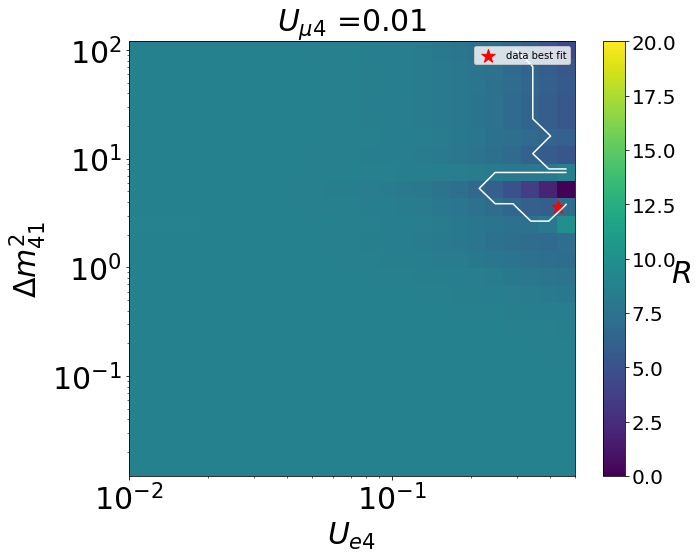

/usr/lib/python3/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'fontsize'


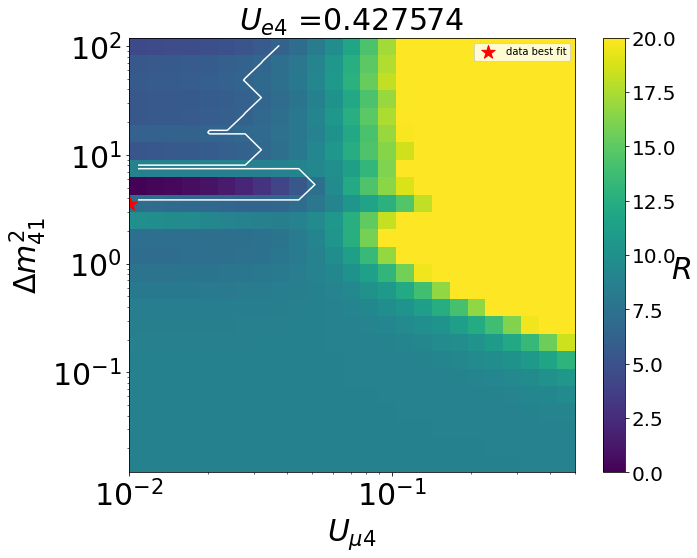

/usr/lib/python3/dist-packages/ipykernel_launcher.py:69: UserWarning: The following kwargs were not used by contour: 'fontsize'


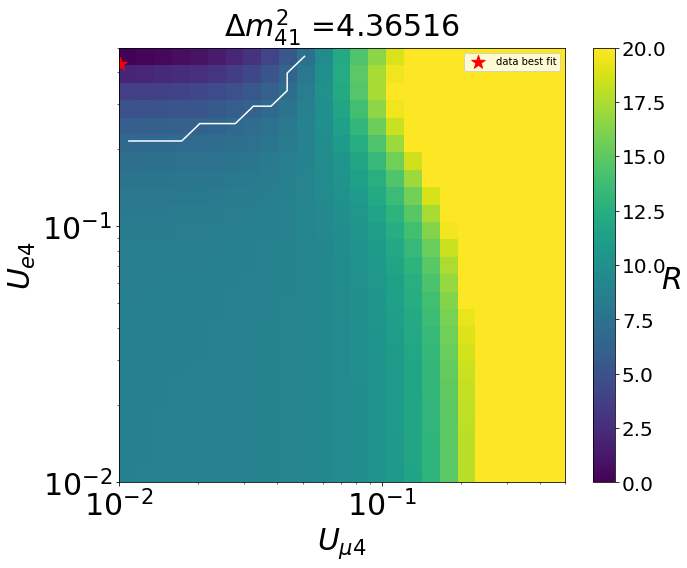

In [7]:
# make projections at fake data best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 10,24,24
# fake data set 2: 15,0,20
# data best fit: 12,24, 0

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,:,0],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr1[:,:,0],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(chi2_min1[2],chi2_min1[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("data_umu4_bfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[24,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[24,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(chi2_min1[3],chi2_min1[1]**2,marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("data_ue4_bfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,16,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[:,16,:],[.9], colors='white',fontsize=20);
plt.scatter(chi2_min1[3],chi2_min1[2],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[16]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
pkl.dump(fig,open("data_m41_bfslice.p",'wb'))
plt.show()
plt.close()


[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


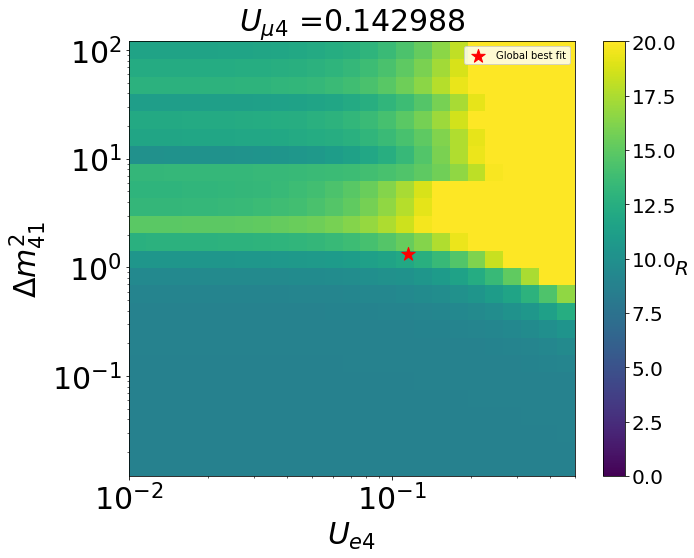

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'fontsize'


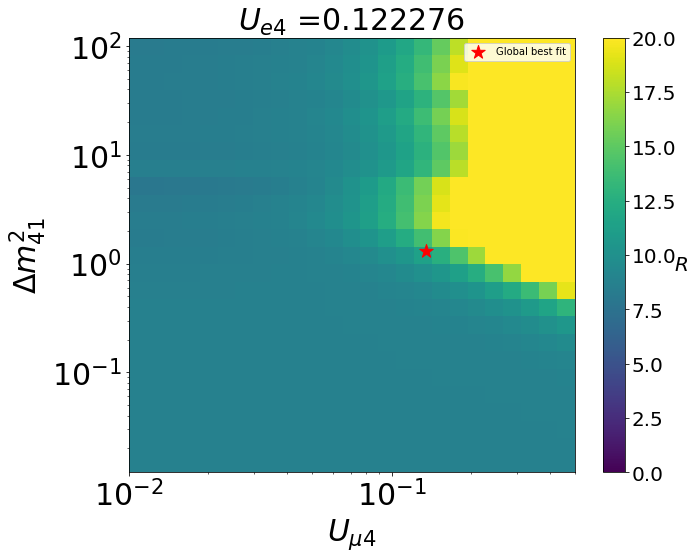

/usr/lib/python3/dist-packages/ipykernel_launcher.py:68: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'fontsize'


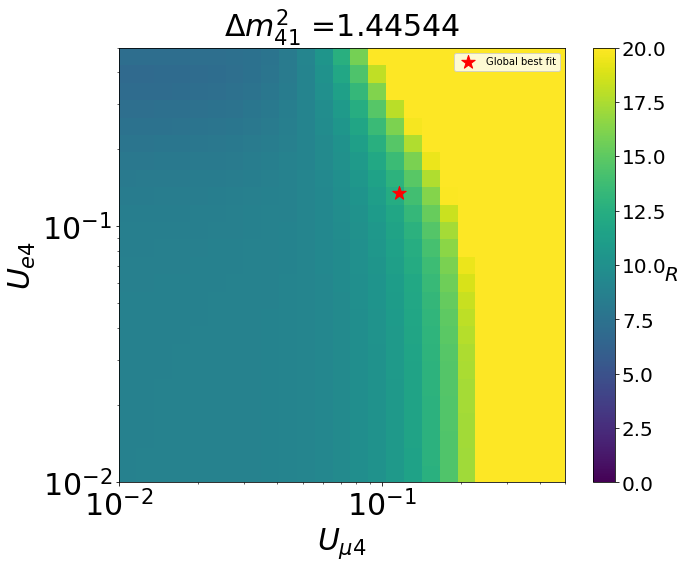

In [8]:
# repeat for global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 8,24,23
# fake data set 2: 15,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr1[:,:,17],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
pkl.dump(fig,open("data_umu4_gbfslice.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend()
pkl.dump(fig,open("data_ue4_gbfslice.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens1[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr1[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.legend()
pkl.dump(fig,open("data_m41_gbfslice.p",'wb'))
plt.show()
plt.close()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  from ipykernel import kernelapp as app


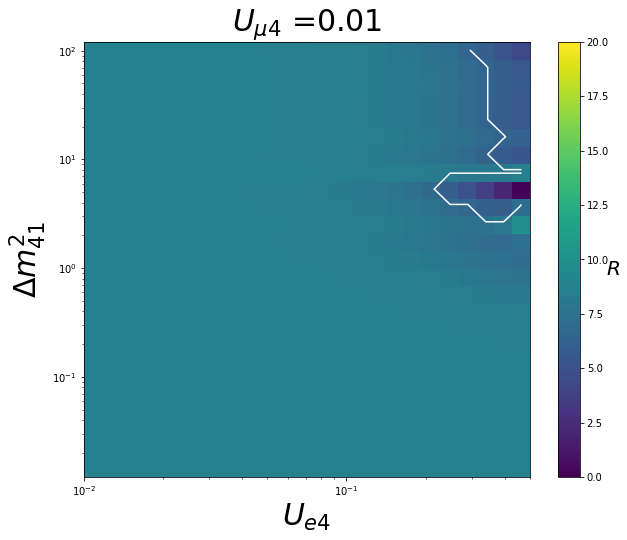

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


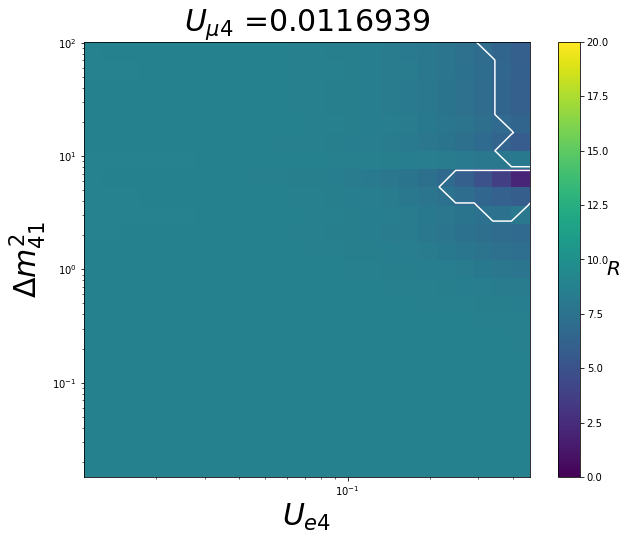

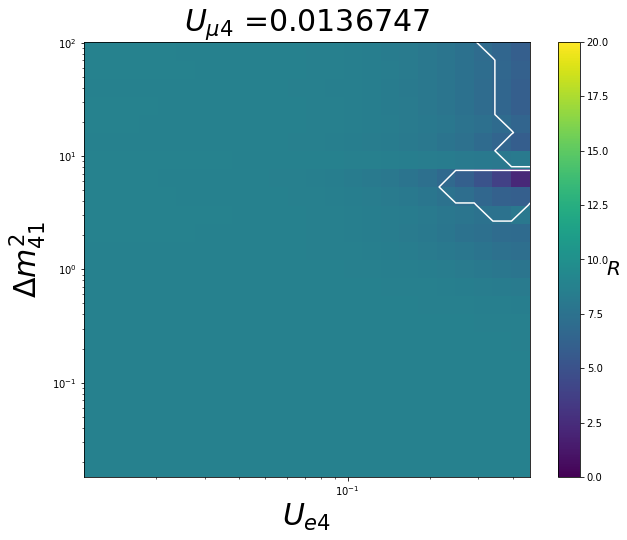

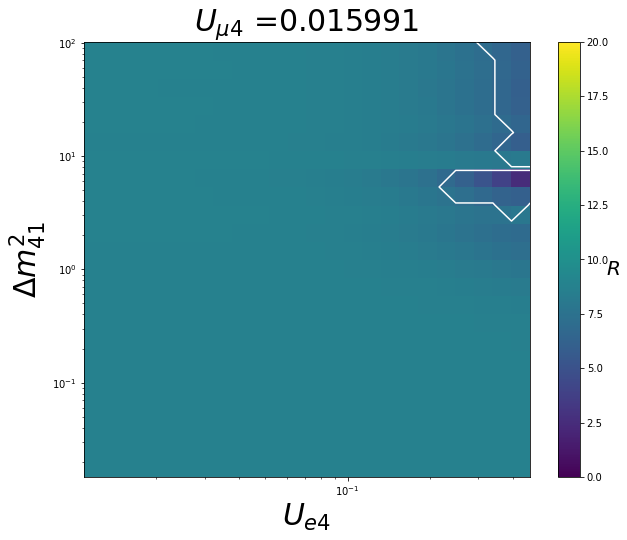

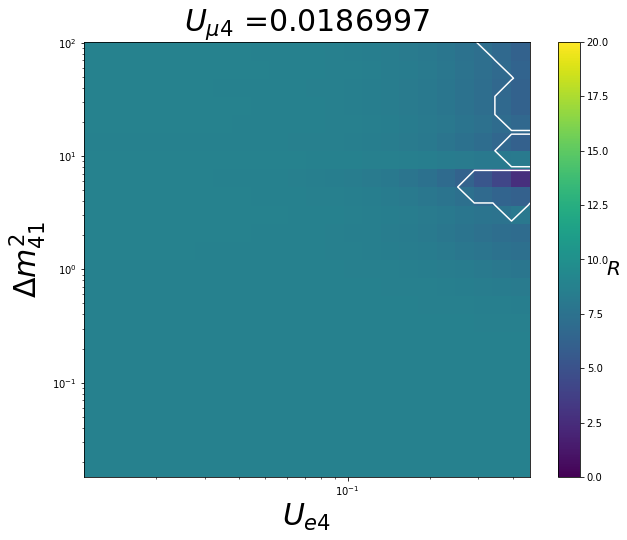

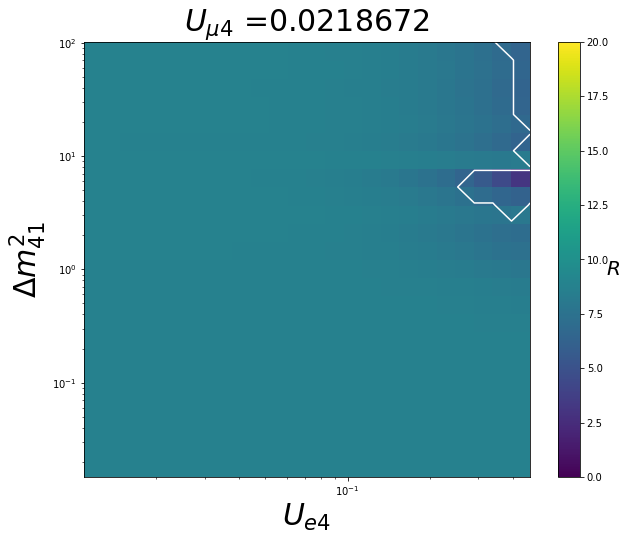

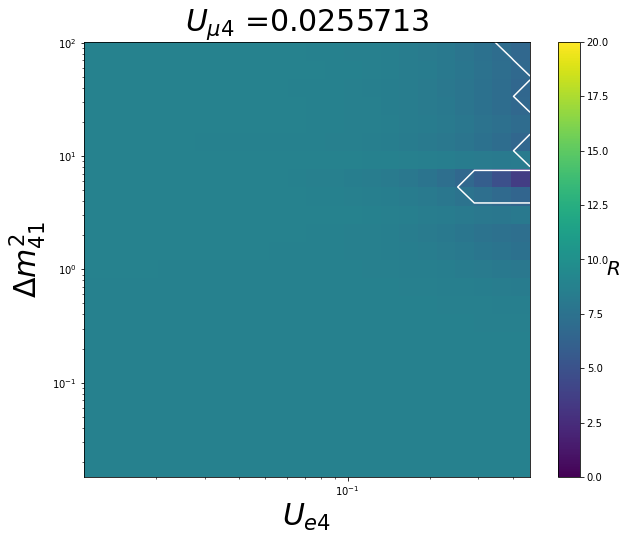

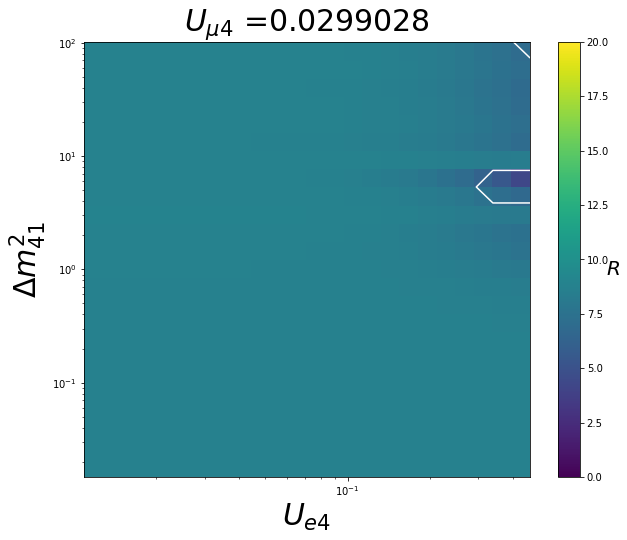

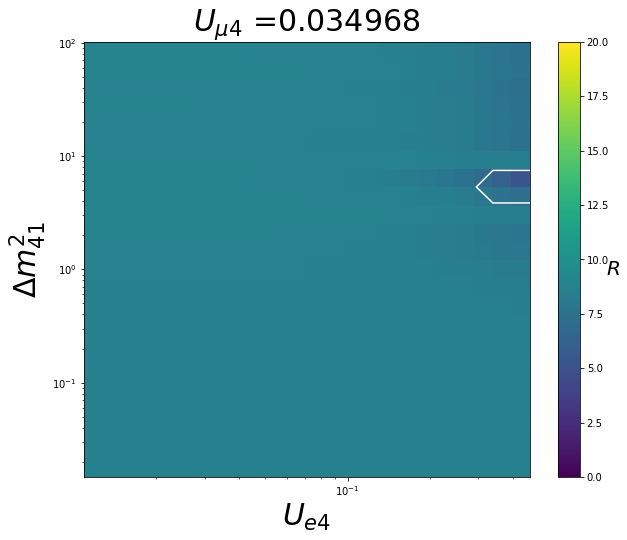

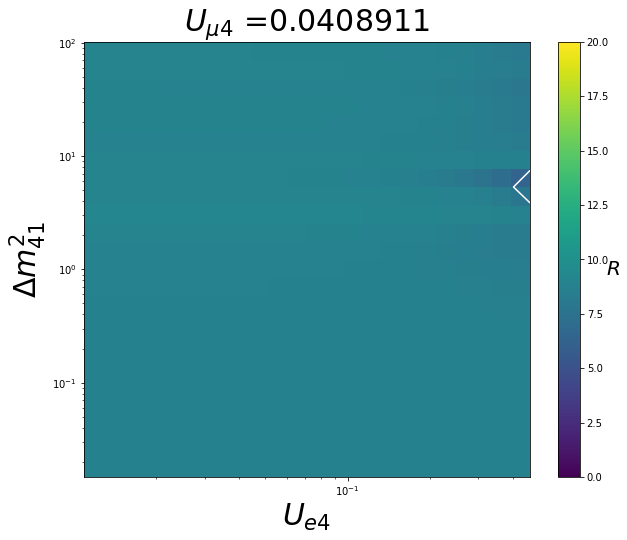

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app


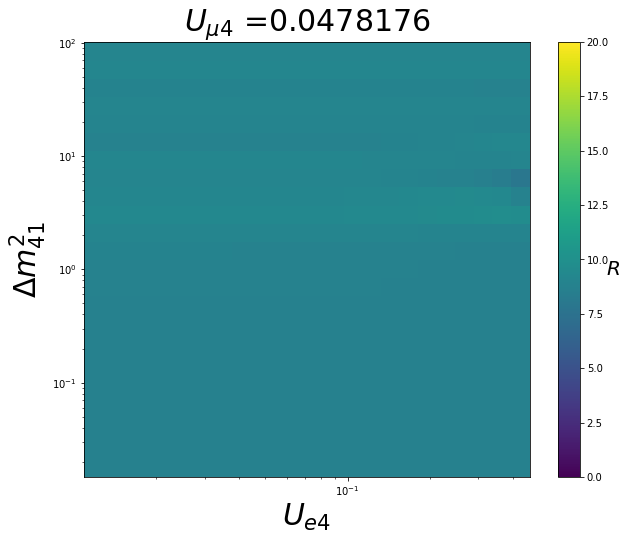

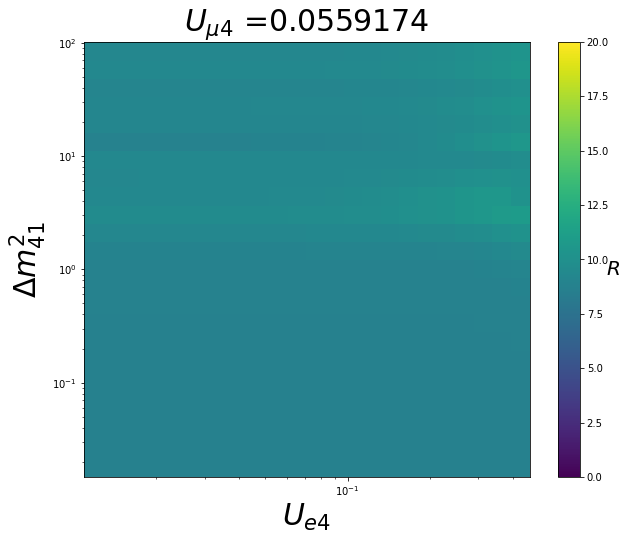

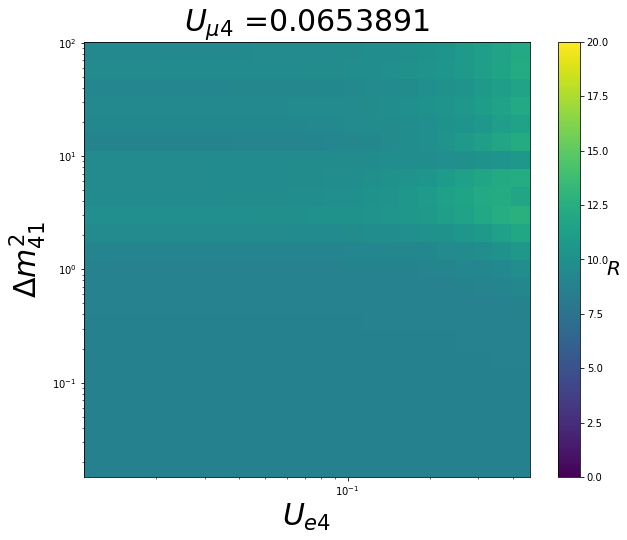

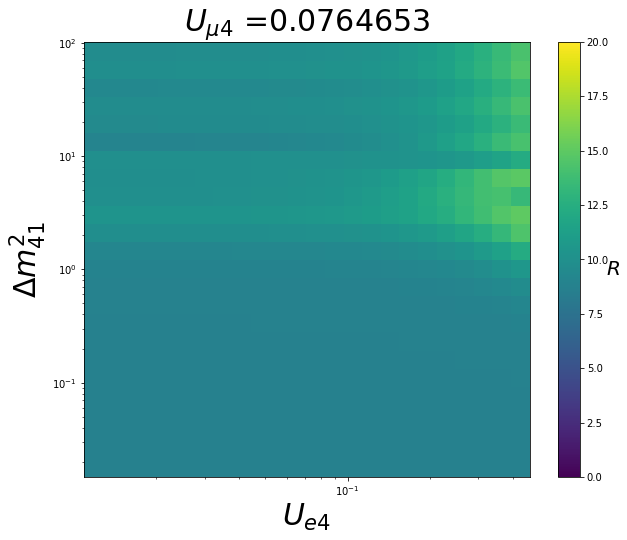

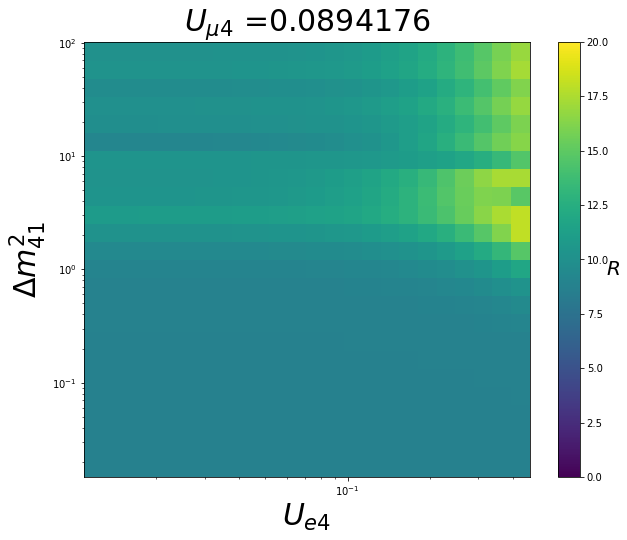

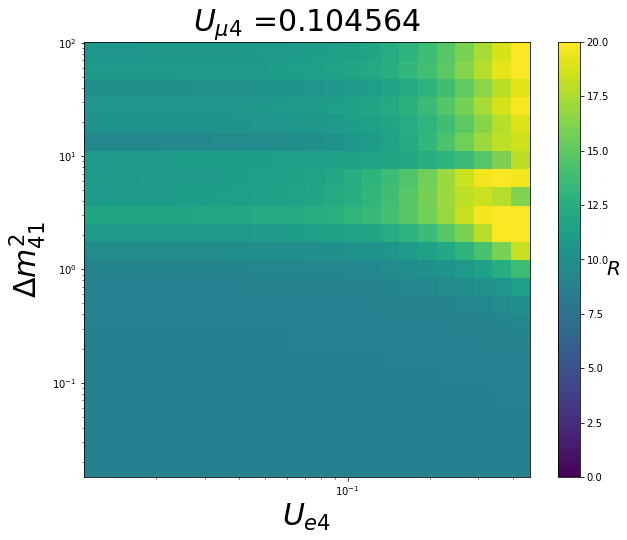

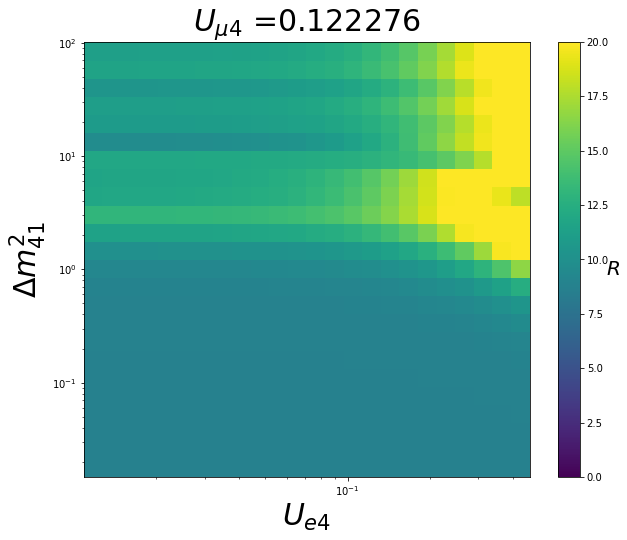

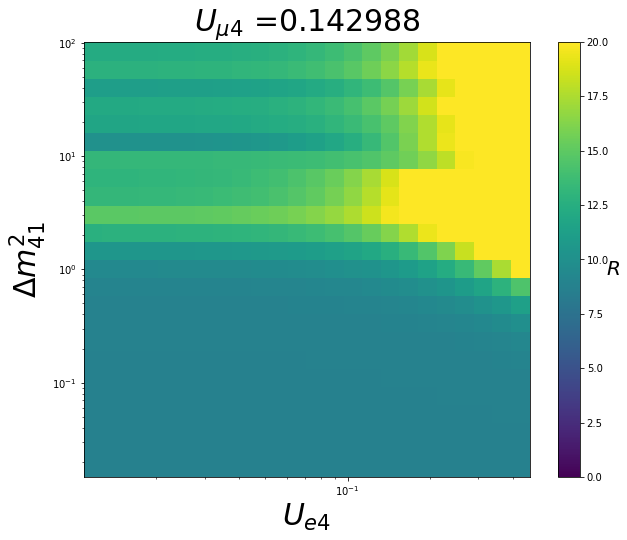

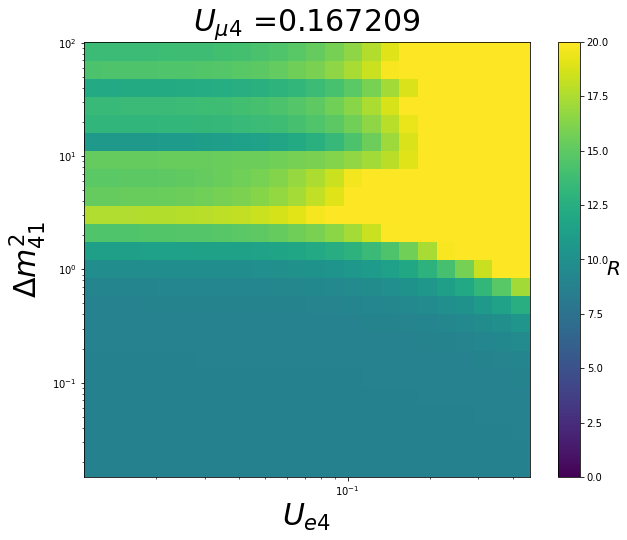

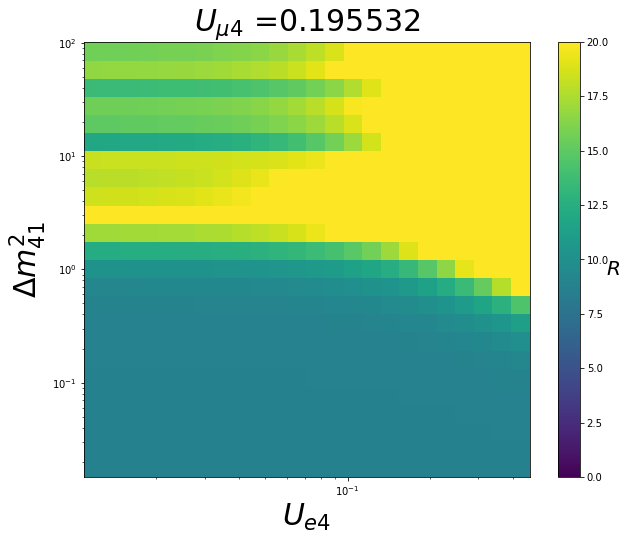

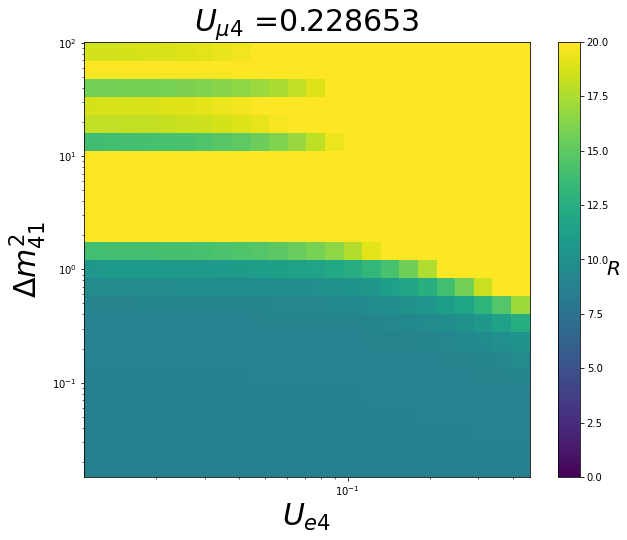

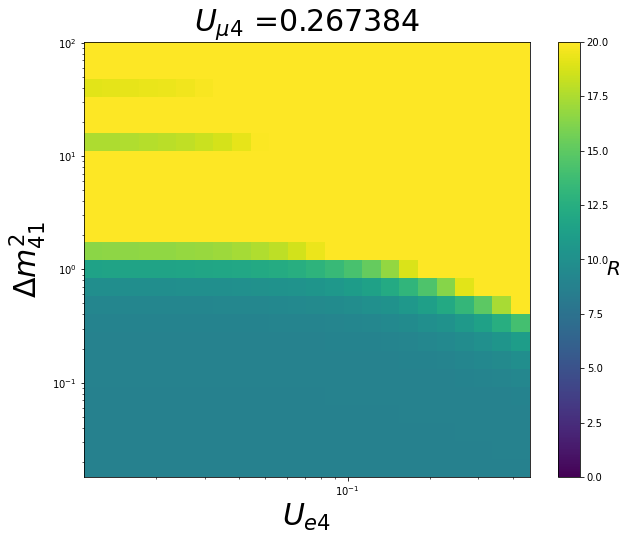

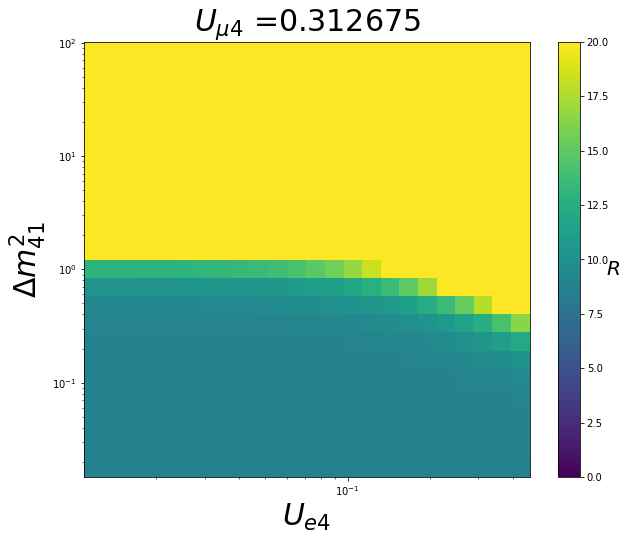

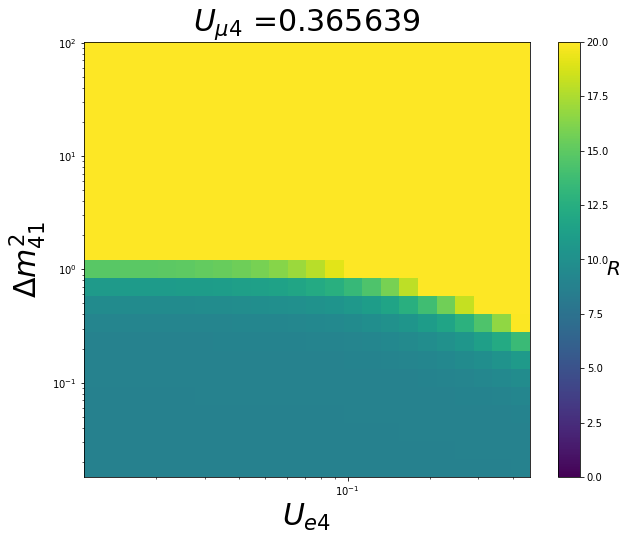

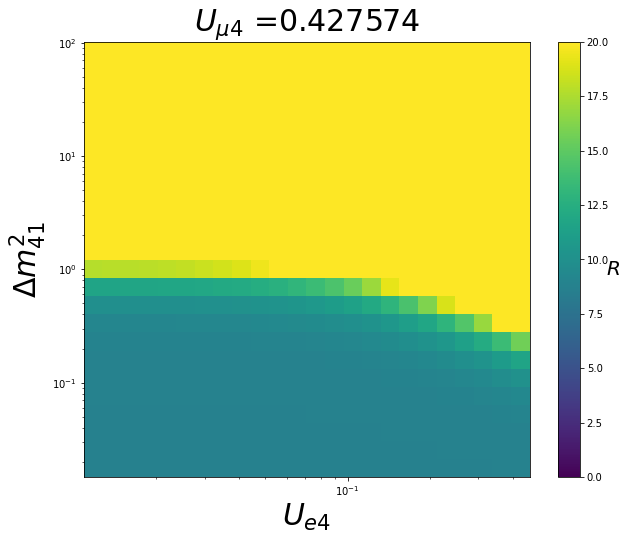

/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'fontsize'


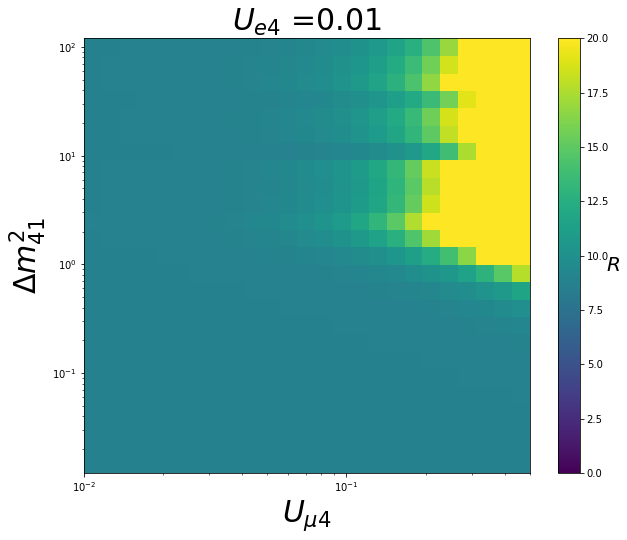

/usr/lib/python3/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


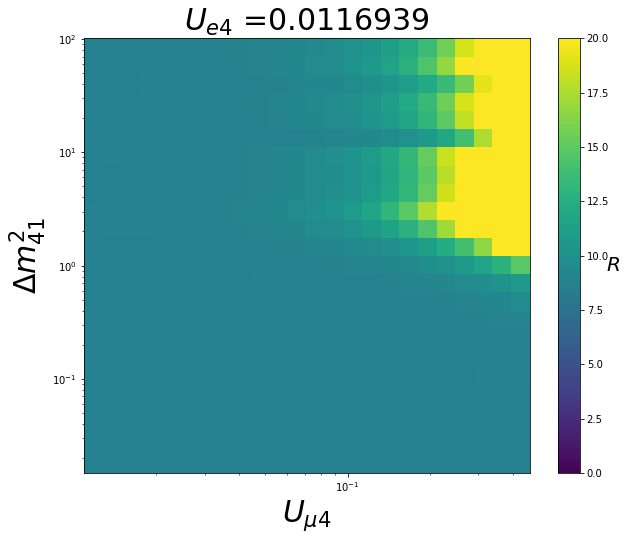

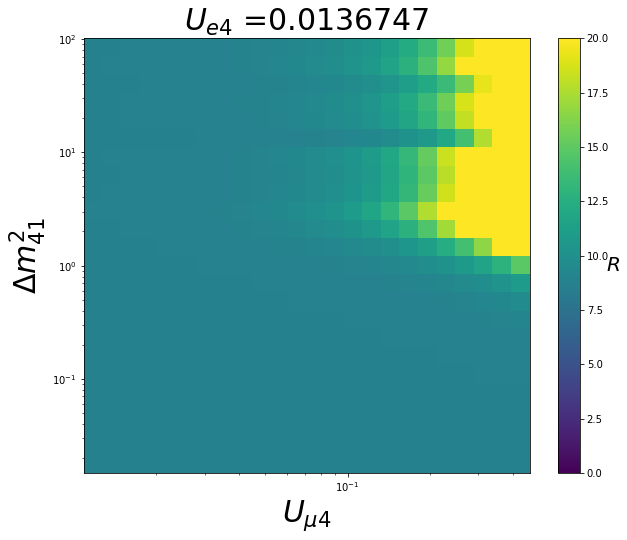

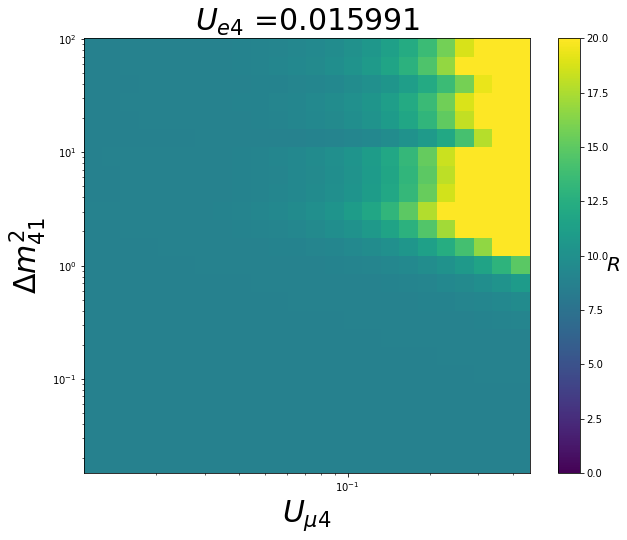

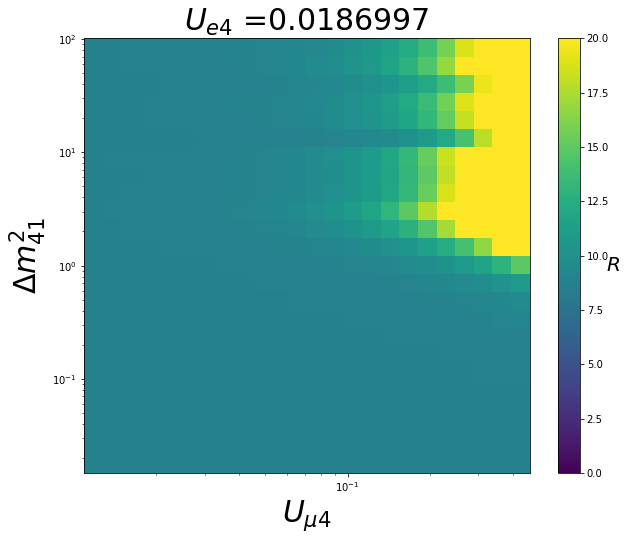

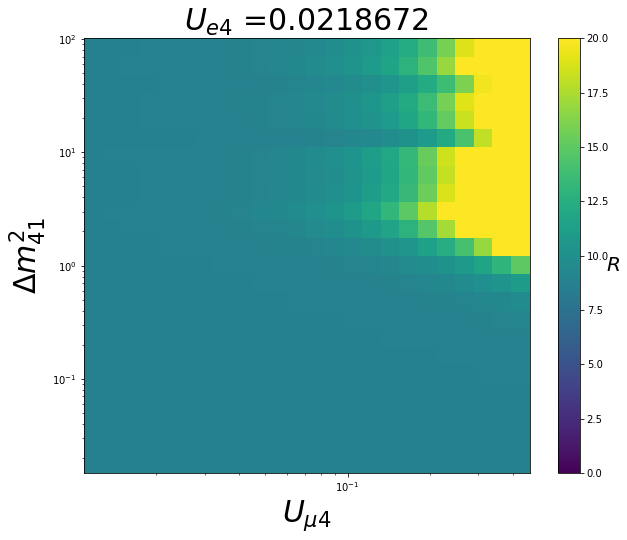

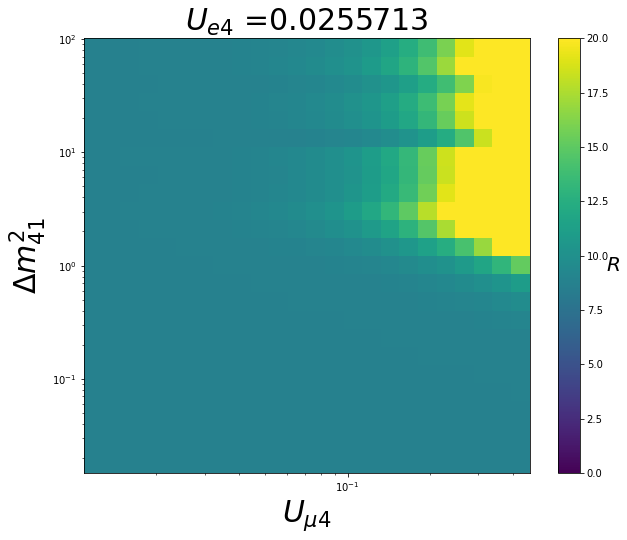

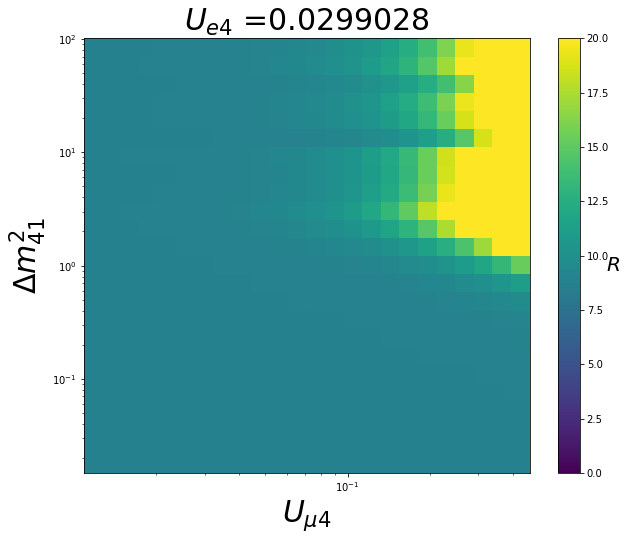

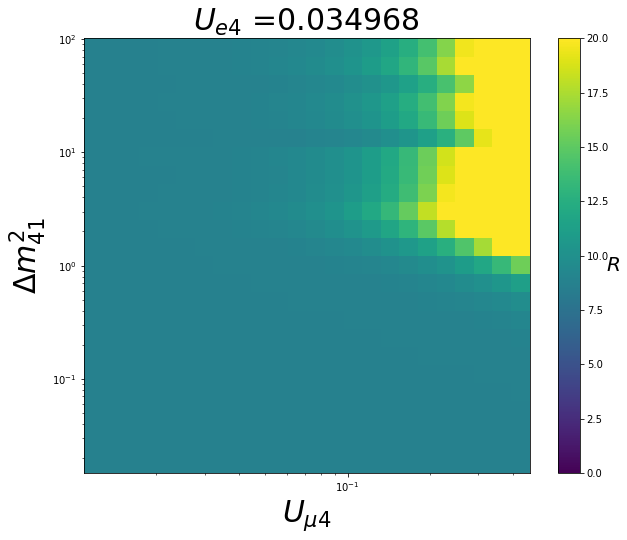

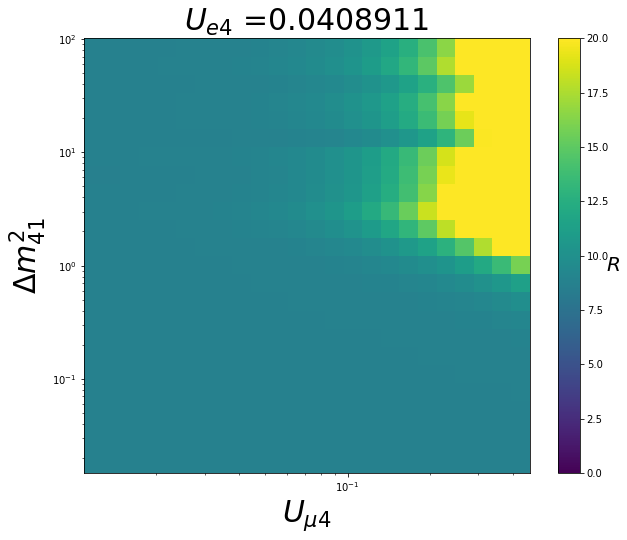

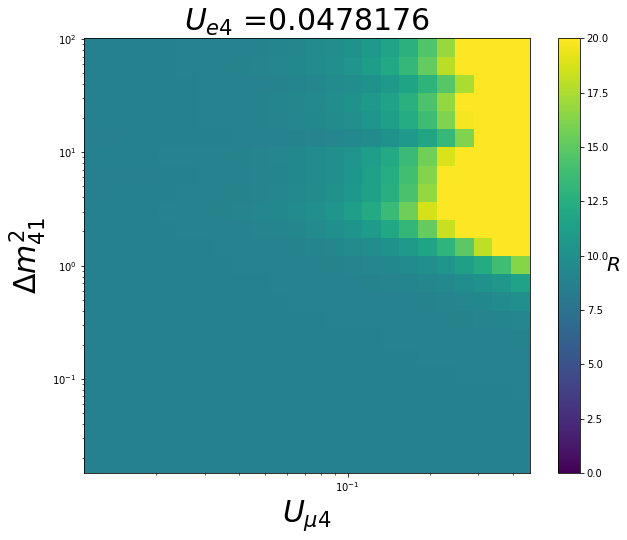

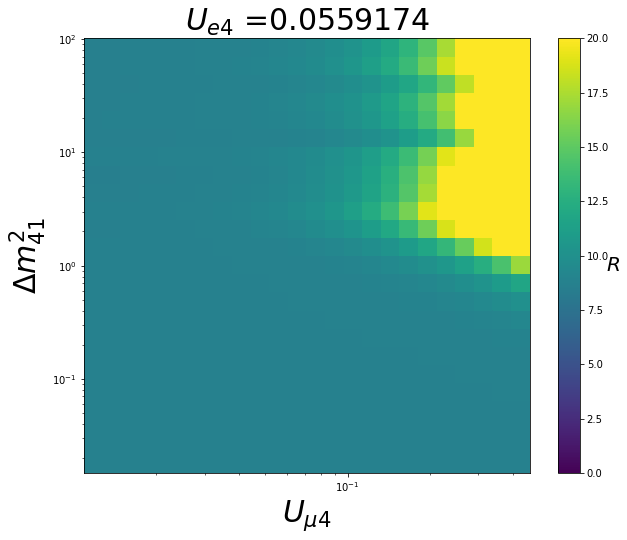

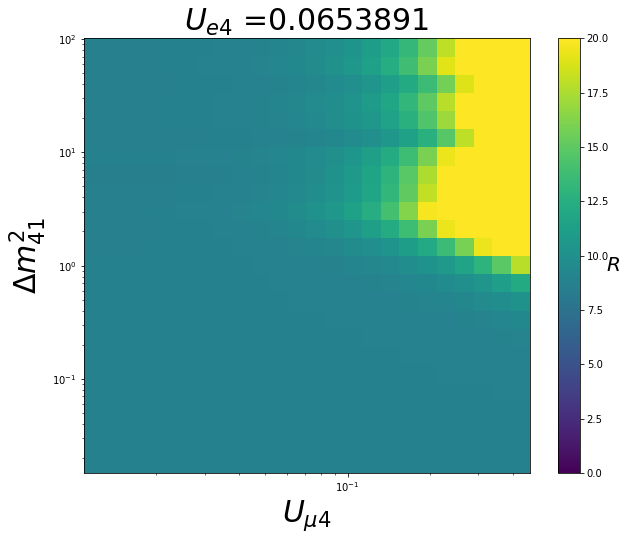

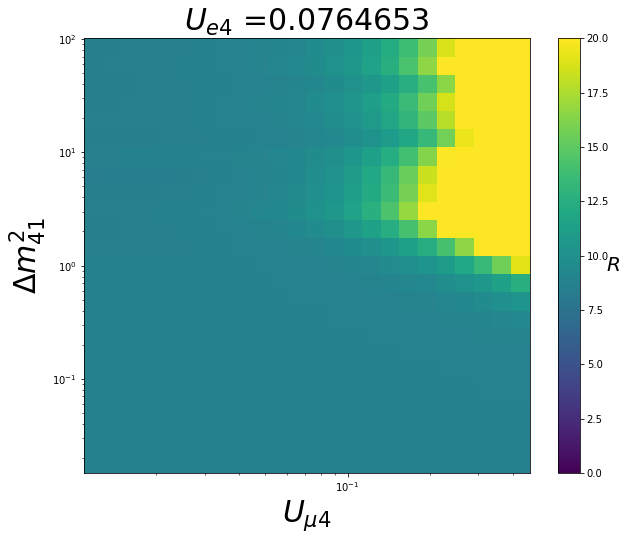

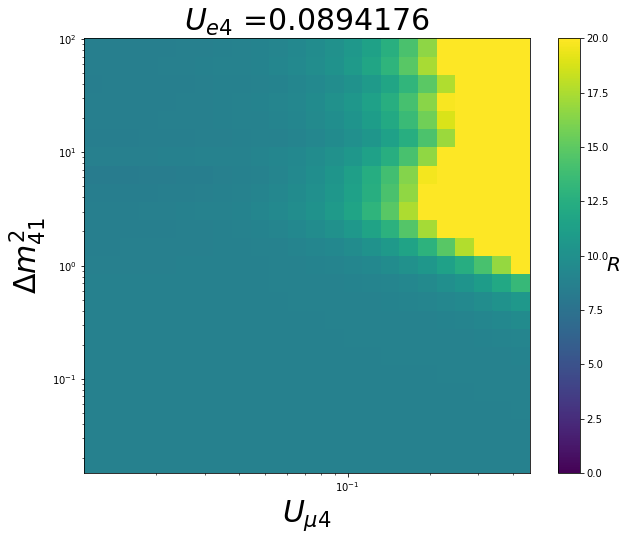

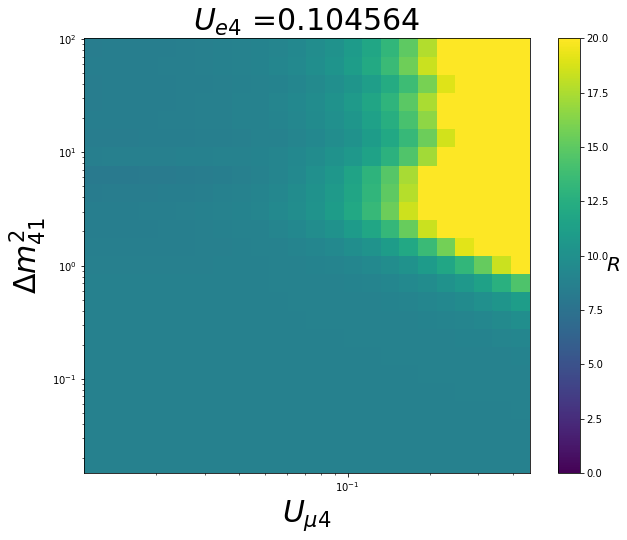

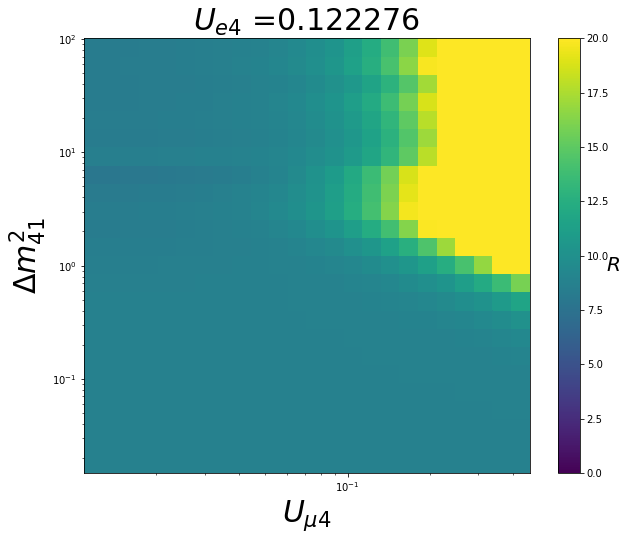

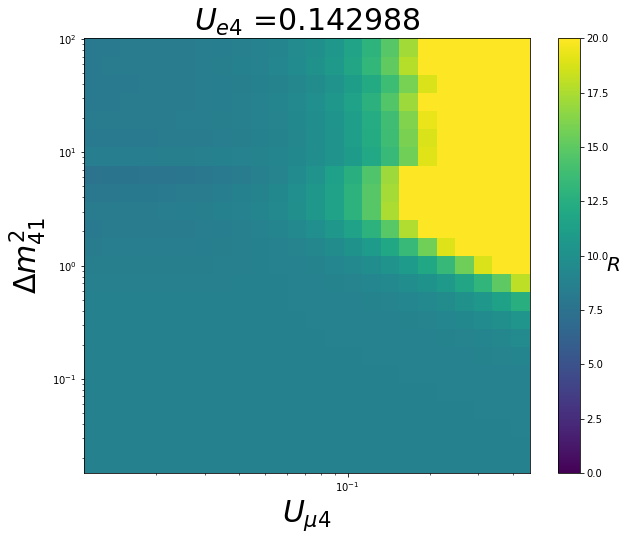

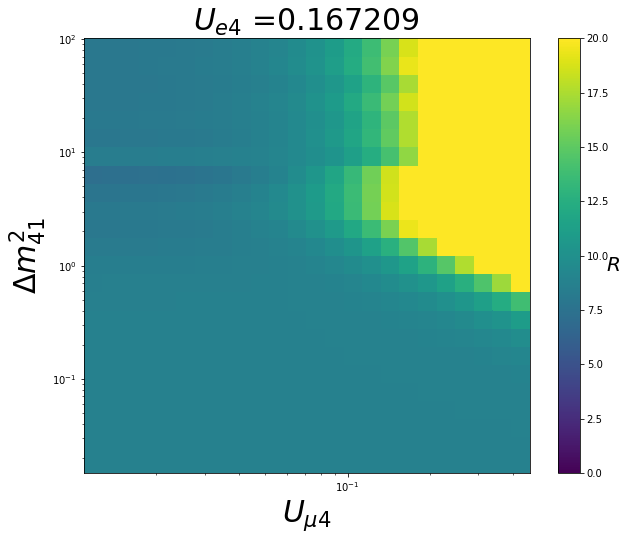

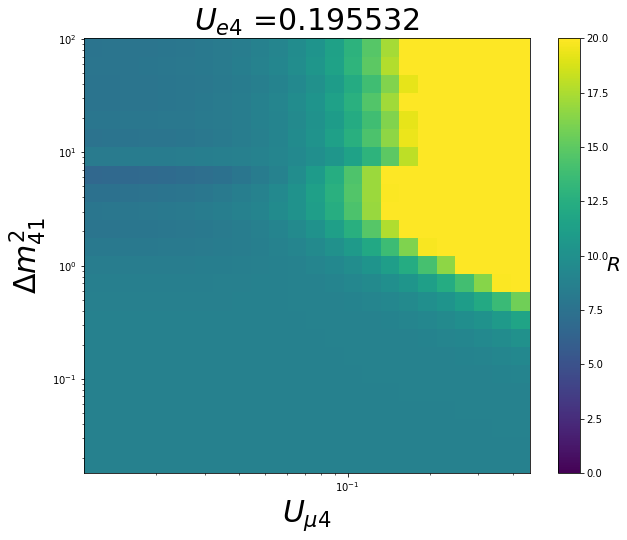

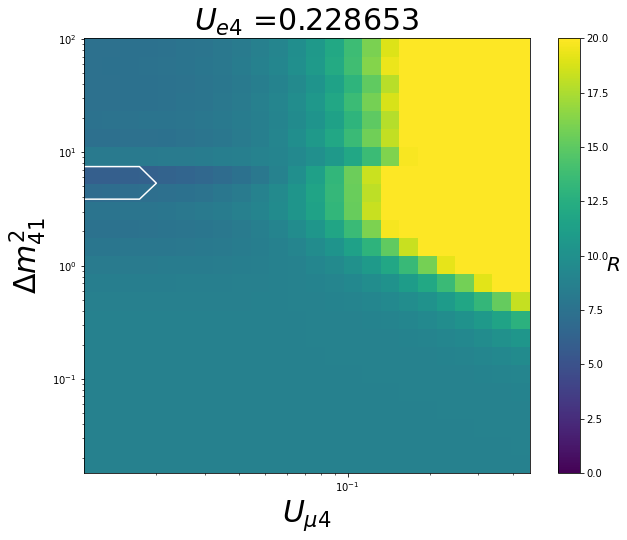

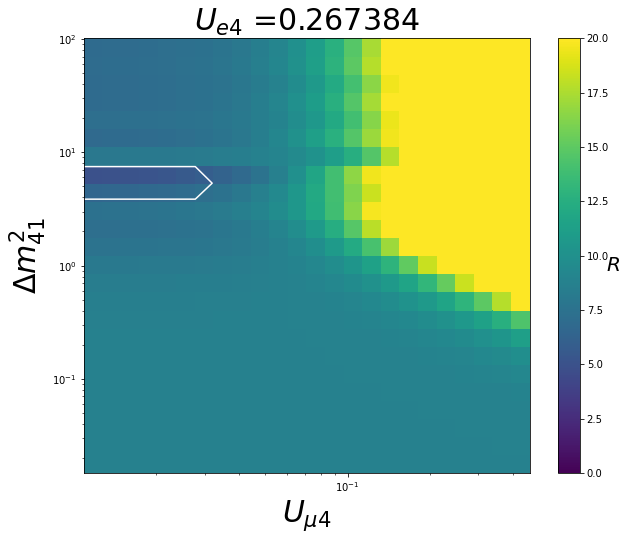

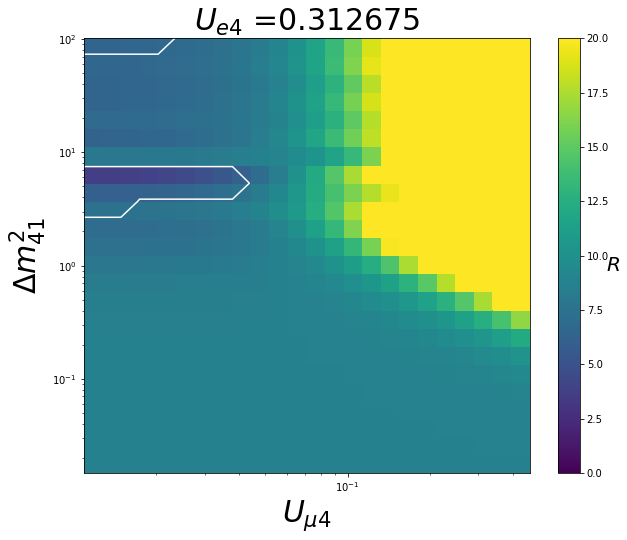

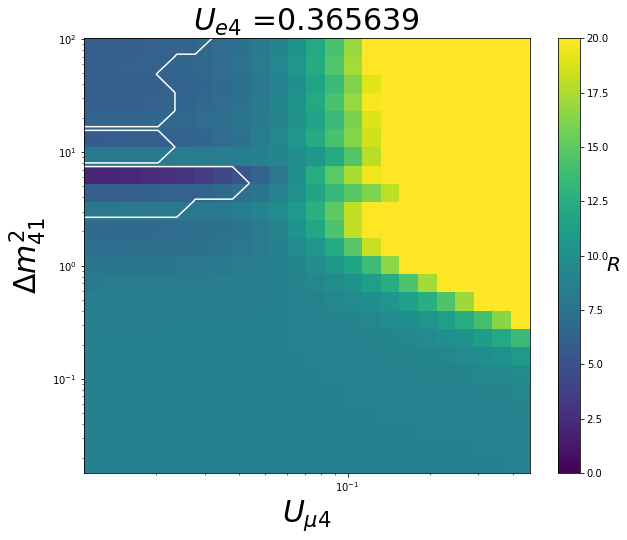

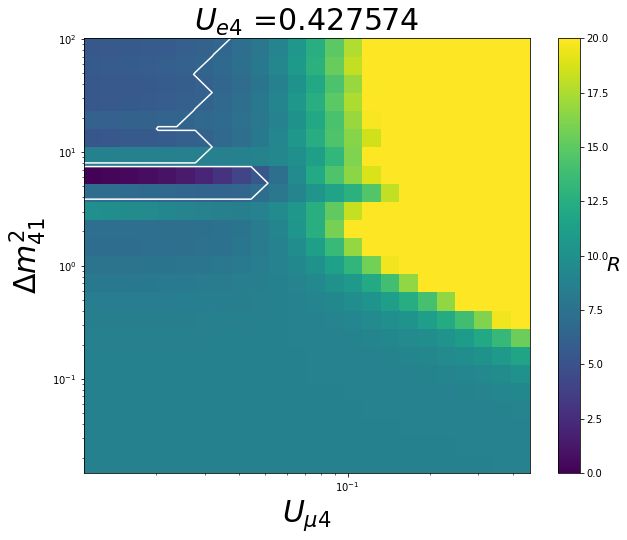

/usr/lib/python3/dist-packages/ipykernel_launcher.py:53: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'fontsize'


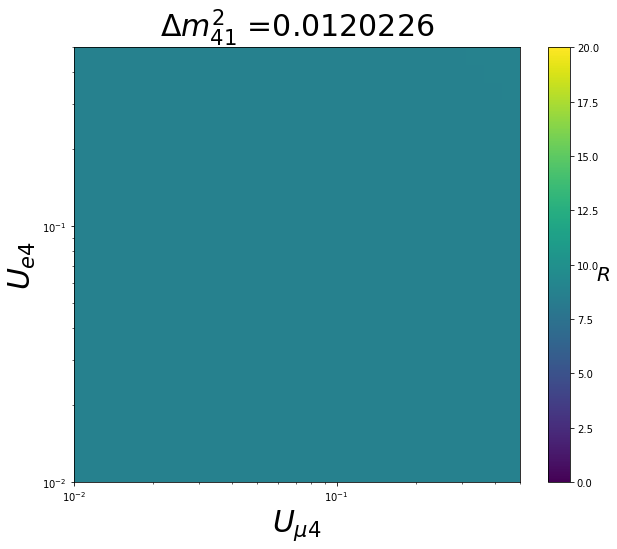

/usr/lib/python3/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


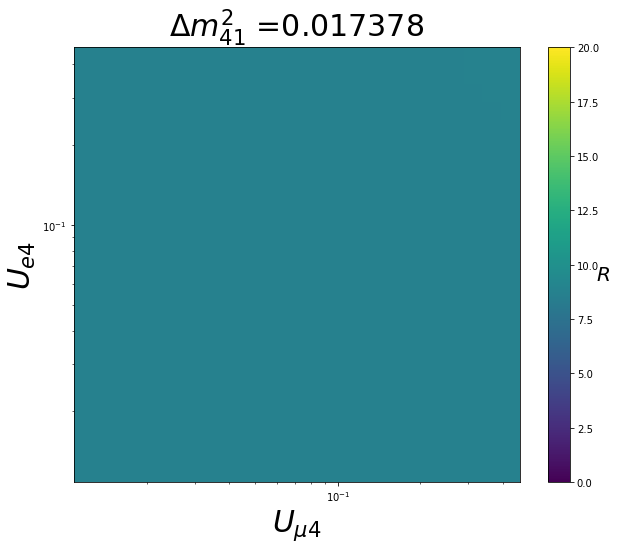

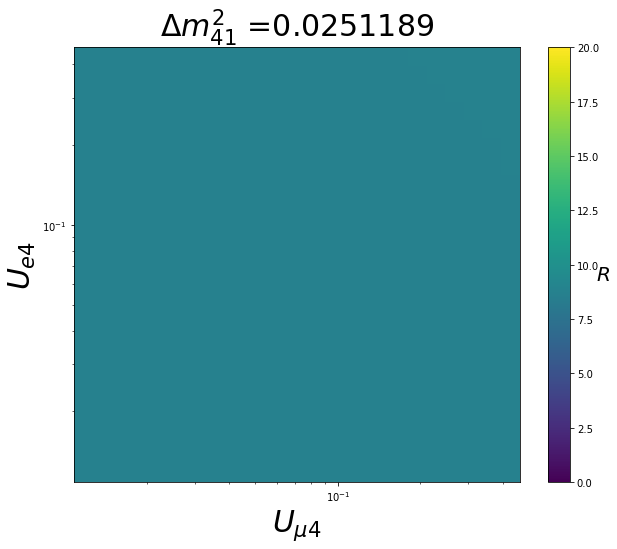

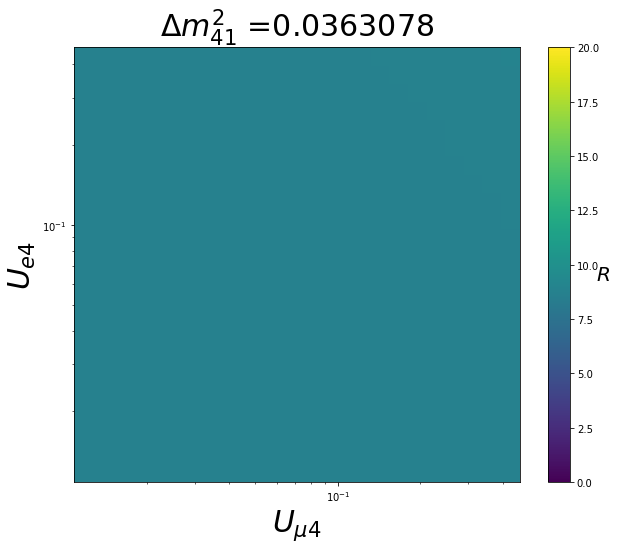

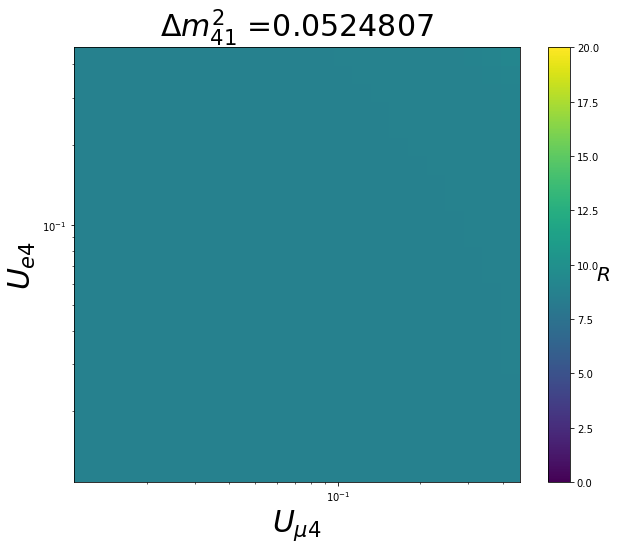

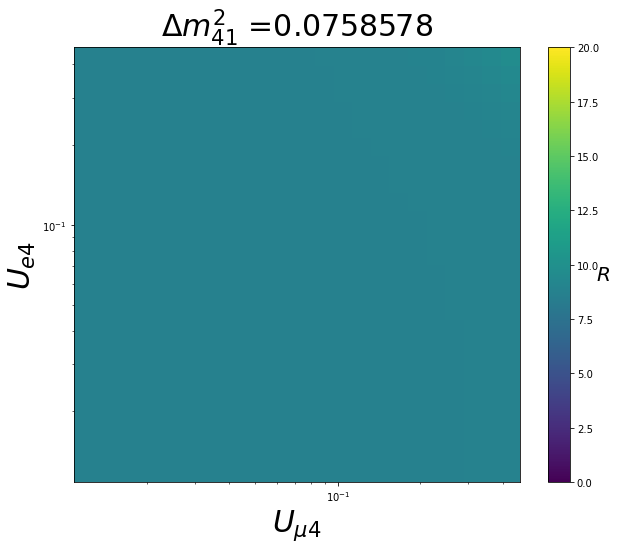

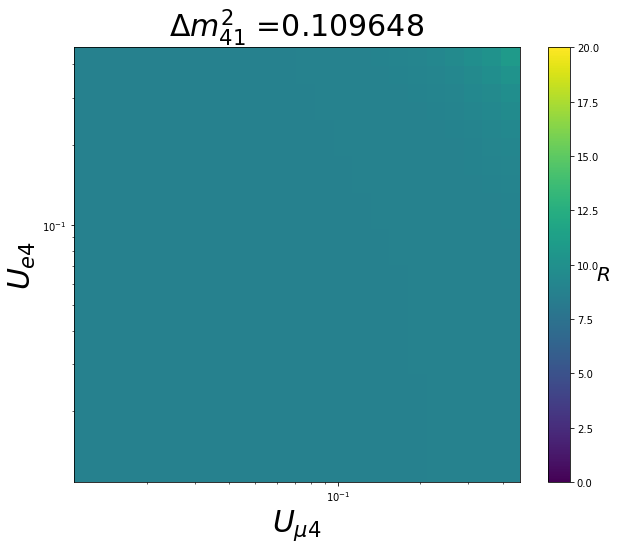

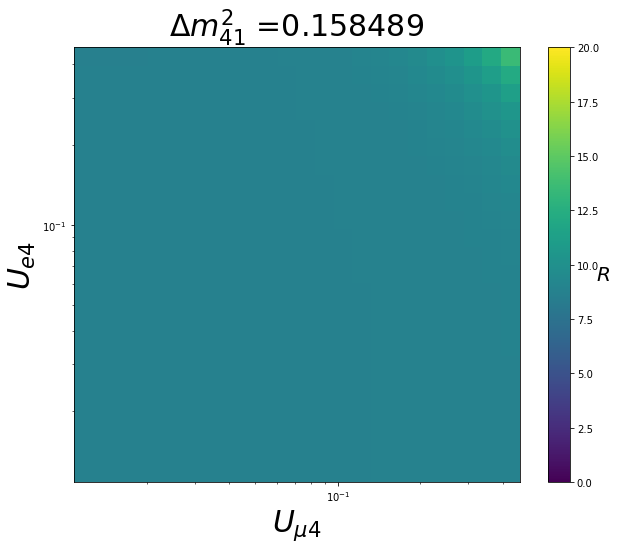

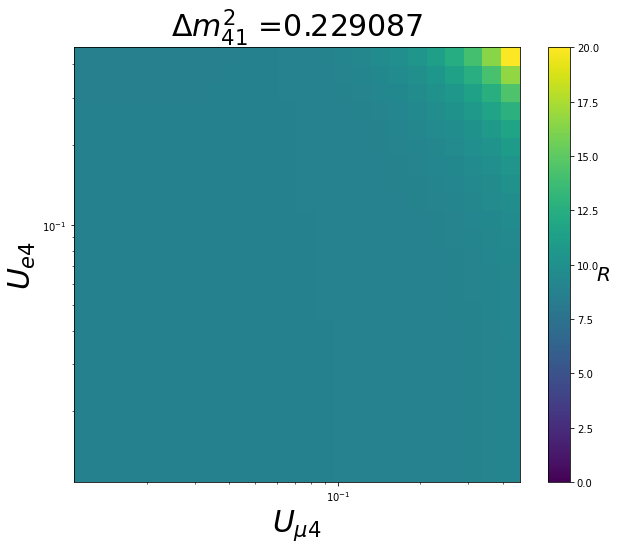

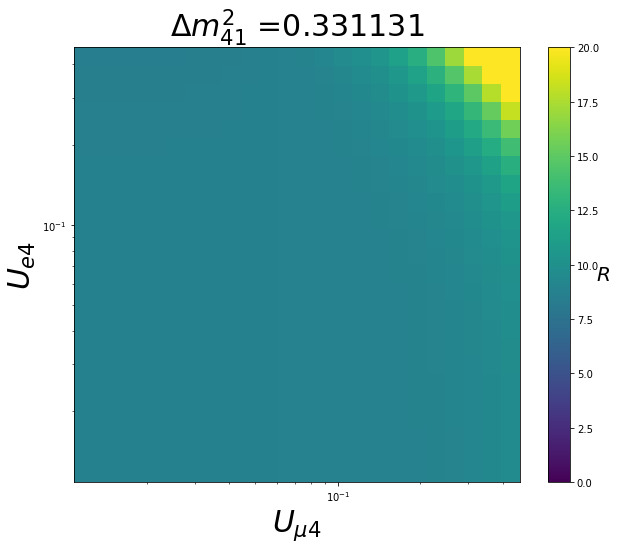

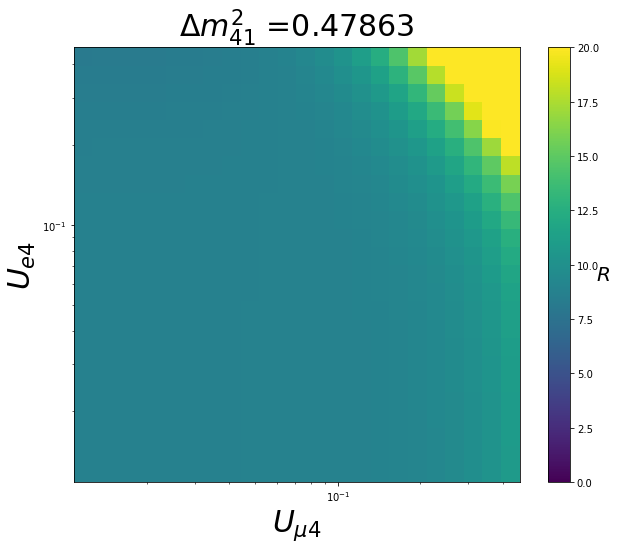

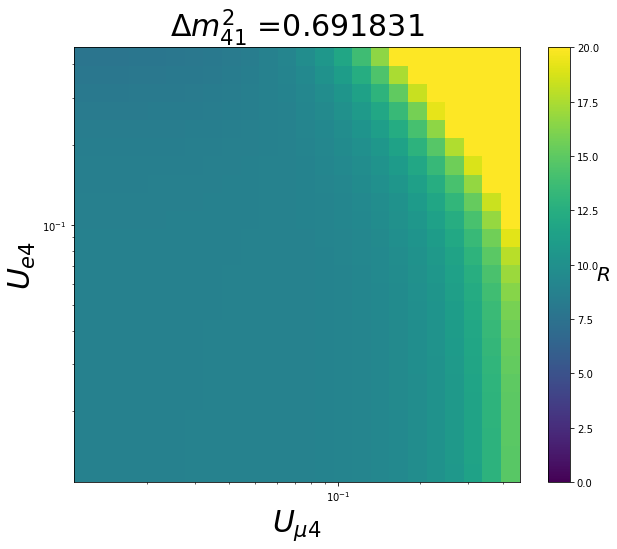

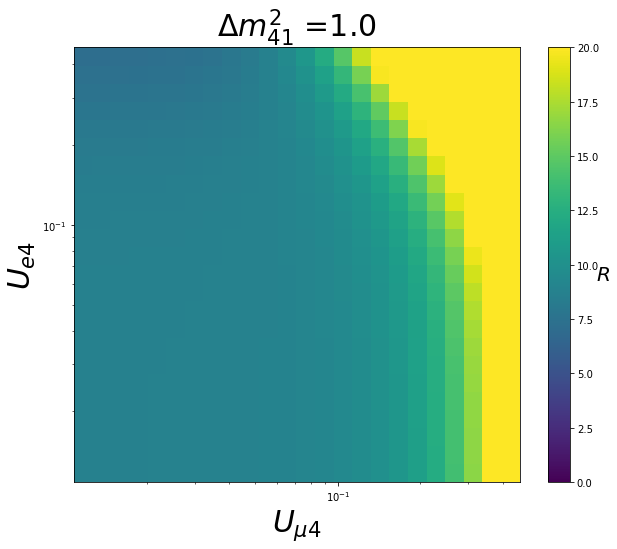

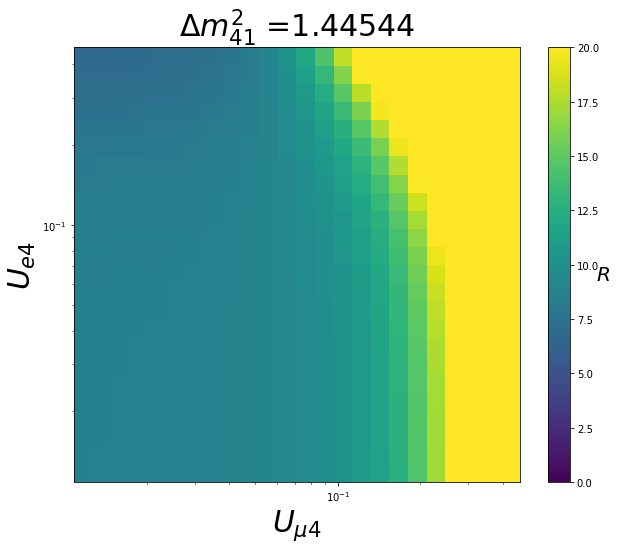

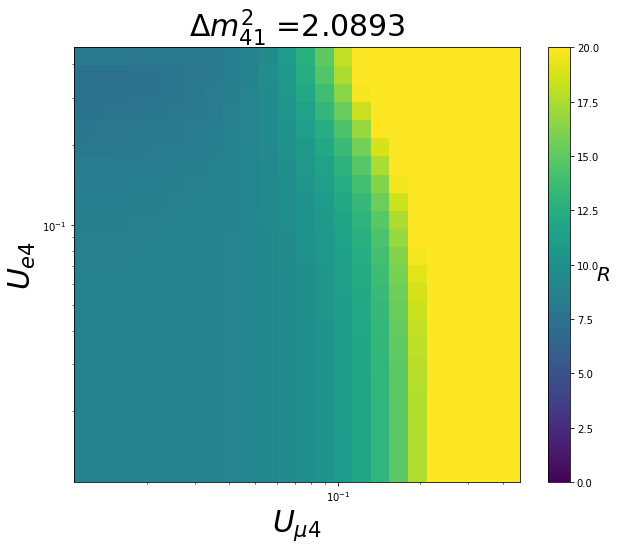

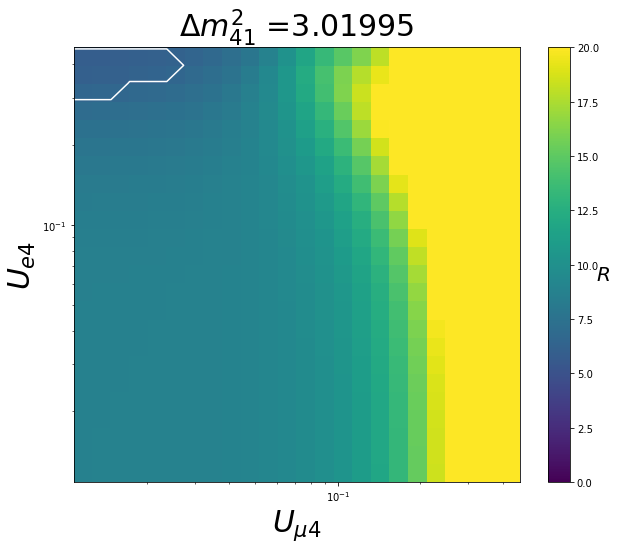

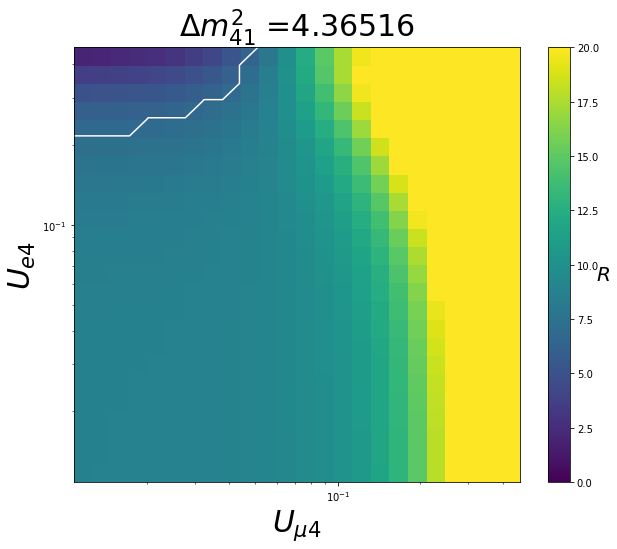

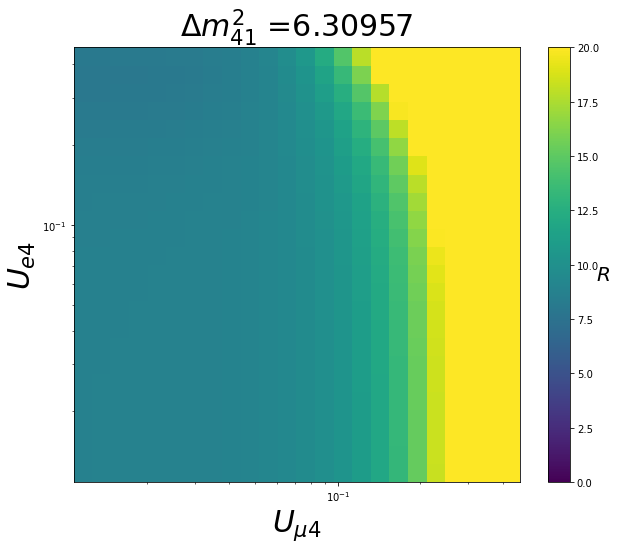

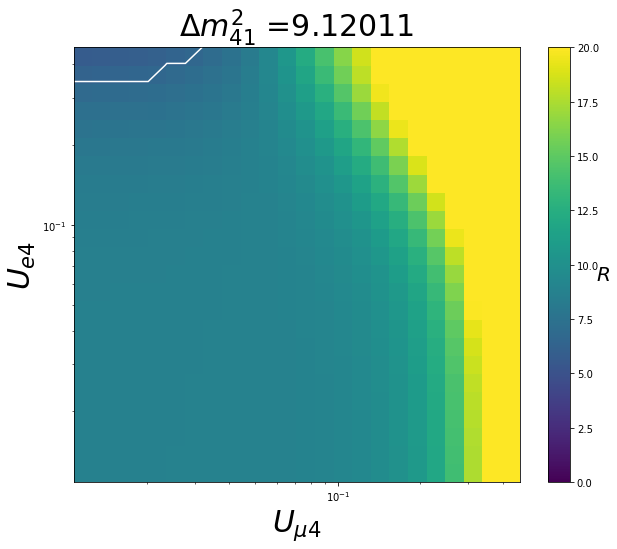

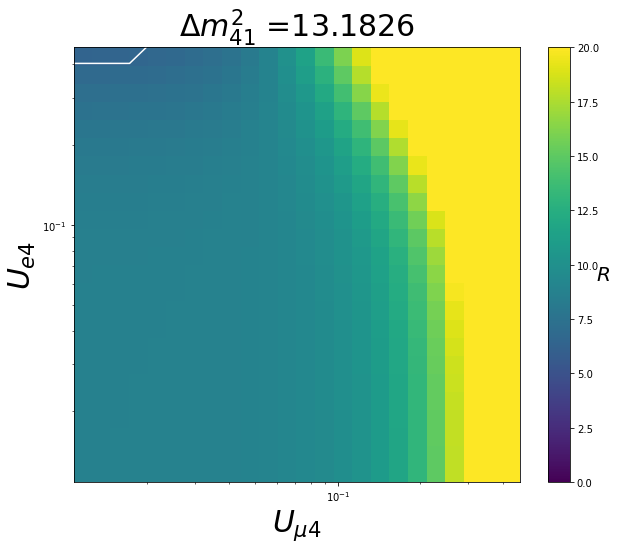

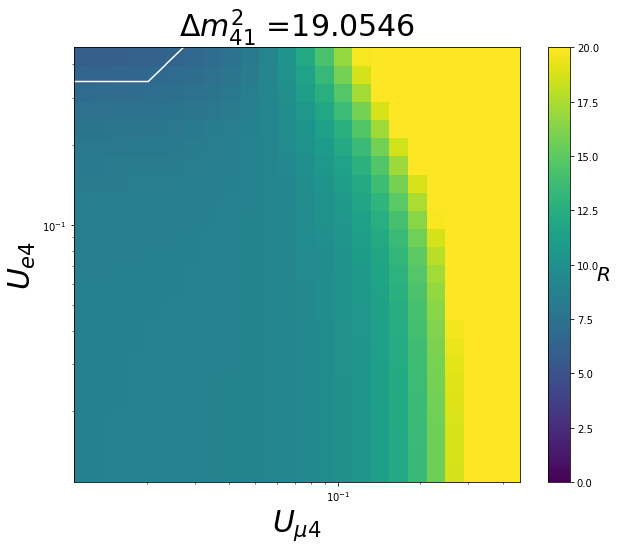

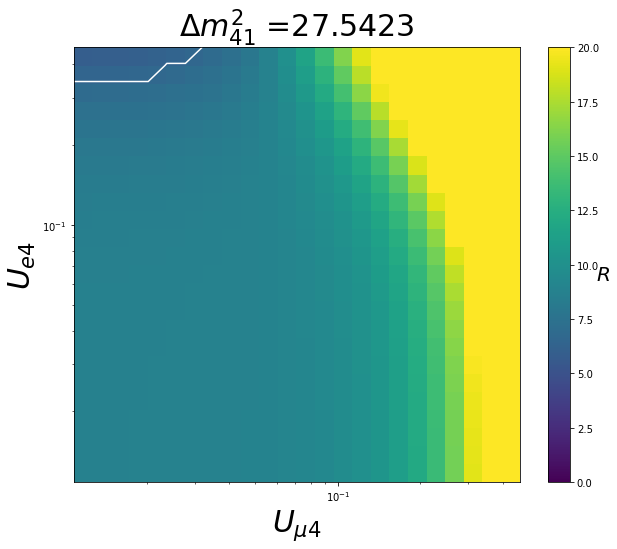

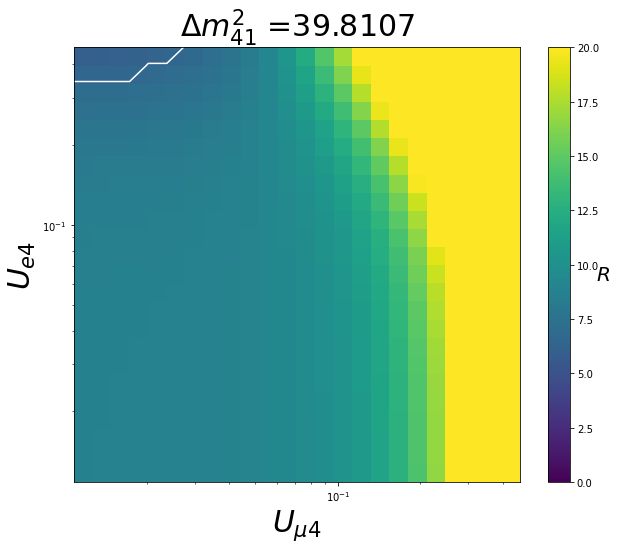

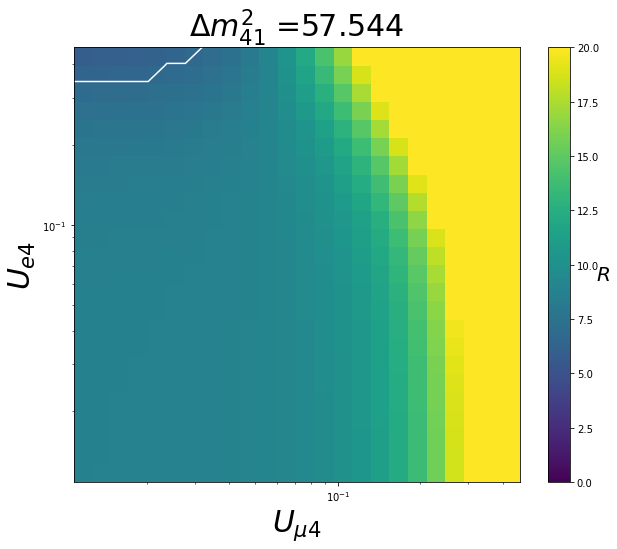

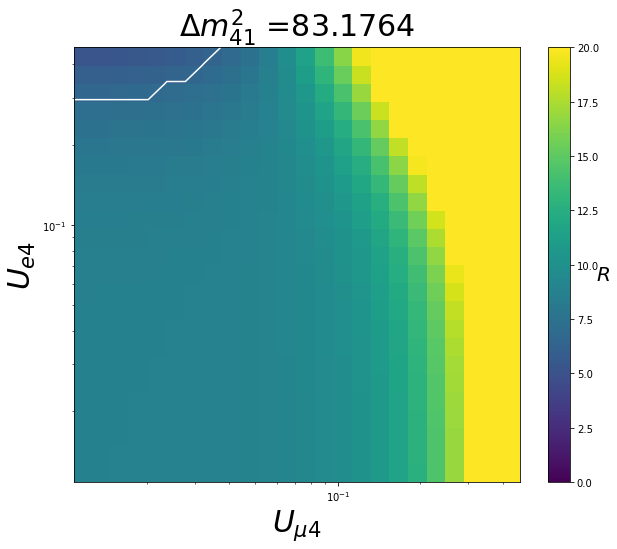

In [9]:
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens1[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr1[:,:,i],[.9], colors='white',fontsize=20,label="wilks 90% CL")
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("data_umu4_slice_"+str(i)+".p",'wb'))
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens1[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr1[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("data_ue4_slice_"+str(i)+".p",'wb'))
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens1[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr1[:,i,:],[.9], colors='white',fontsize=20);
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    pkl.dump(fig,open("data_m41_slice_"+str(i)+".p",'wb'))
    plt.show()
    plt.close()


In [10]:
def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    print("Poisson errors:",k)
    k=np.array(k)
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k

# now make a funtion for spectra plotting
def plothist(data_e,data_m,spec_e,spec_m,bins_e,bins_m,datatitle,cv_e,cv_m,colors_e,colors_m,labels_e,labels_m,cov_e,cov_m):
#     change cov to be total
    cov_e=[cov_e[i]*((spec_e[0][i]+spec_e[1][i]+spec_e[2][i])**2) for i in range(len(bins_e)-1)]
    cov_m=[cov_m[i]*((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])**2) for i in range(len(bins_m)-1)]
    
    #adjust the last two bins of 1e1p because of width
    data_e[-1]=data_e[-1]/float(4.0)
    data_e[-2]=data_e[-2]/float(8.0)
    cv_e[-1]=cv_e[-1]/float(4.0)
    cv_e[-2]=cv_e[-2]/float(8.0)
    cov_e[-1]=cov_e[-1]/float(4.0)
    cov_e[-2]=cov_e[-2]/float(8.0)
    for spec in spec_e:
        spec[-1]=spec[-1]/float(4.0)
        spec[-2]=spec[-2]/float(8.0)
   
    #set overall paramters
    fonts=20
    ymax_e=12
    ymax_m=550
    
    # get centers of bins
    centers_e=[]
    centers_m=[]
    for i in range(len(bins_e)-1):
        centers_e.append(((bins_e[i+1]-bins_e[i])/2.0)+bins_e[i])
    print(centers_e)
    for i in range(len(bins_m)-1):
        centers_m.append(((bins_m[i+1]-bins_m[i])/2.0)+bins_m[i])
        
    # set size of xerr for data points (half bin width)
    xerr_e=[50,50,50,50,50,50,50,50,50,50,200,400]
    xerr_m=[25 for i in range(len(data_m))]
    #now get the y error
    
    yerr_e = poisson_errors(data_e)
    yerr_m = poisson_errors(data_m)
    # get size of MC error
    mcerr_e=[math.sqrt(val) for val in cov_e]
    mcerr_m=[math.sqrt(val) for val in cov_m]
    errboxes_sys_e = []
    errboxes_sys_m = []

    for i in range(len(centers_e)):
        rect0 = Rectangle((bins_e[i],((spec_e[0][i]+spec_e[1][i]+spec_e[2][i]+spec_e[3][i])-mcerr_e[i])),xerr_e[i]*2,mcerr_e[i]*2)
        errboxes_sys_e.append(rect0)
    pc_sys_e = PatchCollection(errboxes_sys_e,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    for i in range(len(centers_m)):
        rect0 = Rectangle((bins_m[i],((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])-mcerr_m[i])),xerr_m[i]*2,mcerr_m[i]*2)
        errboxes_sys_m.append(rect0)
    pc_sys_m = PatchCollection(errboxes_sys_m,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    # now get historams for the 1e1p and plot  
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_e)
    ax.set_xlim(200,2400)
    # for cv, we just want a dashed line
    ax.step(bins_e,cv_e,color='red',linestyle = '-.',label="Null Osc prediction",linewidth=5)
    # next is data
    plt.errorbar(centers_e, data_e, yerr=yerr_e, xerr=xerr_e, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_e[:-1], height=spec_e[0], width=np.diff(bins_e), align='edge', fc=colors_e[0], ec='black',label=labels_e[0],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[1],bottom=np.array(spec_e[0]), width=np.diff(bins_e), align='edge', fc=colors_e[1], ec='black',label=labels_e[1],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[2],bottom=np.array(spec_e[0])+np.array(spec_e[1]), width=np.diff(bins_e), align='edge', fc=colors_e[2], ec='black',label=labels_e[2],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[3],bottom=np.array(spec_e[0])+np.array(spec_e[1])+np.array(spec_e[2]), width=np.diff(bins_e), align='edge', fc=colors_e[3], ec='black',label=labels_e[3],alpha=.5)
    ax.add_collection(pc_sys_e)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 100 MeV',fontsize=fonts)
    plt.title(datatitle+' 1e1p Selection',fontsize=fonts)
    pkl.dump(fig,open("data_1e1p_hist.p",'wb'))
    plt.show()
    plt.close()
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_m)
    ax.set_xlim(250,1200)
    # for cv, we just want a dashed line
    ax.step(bins_m,cv_m,color='red',linestyle = '-.',label="Null Osc prediction",linewidth=5)
    # next is data
    plt.errorbar(centers_m, data_m, yerr=yerr_m, xerr=xerr_m, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_m[:-1], height=spec_m[0], width=np.diff(bins_m), align='edge', fc=colors_m[0], ec='black',label=labels_m[0],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[1],bottom=np.array(spec_m[0]), width=np.diff(bins_m), align='edge', fc=colors_m[1], ec='black',label=labels_m[1],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[2],bottom=np.array(spec_m[0])+np.array(spec_m[1]), width=np.diff(bins_m), align='edge', fc=colors_m[2], ec='black',label=labels_m[2],alpha=.5)
    ax.add_collection(pc_sys_m)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 50 MeV',fontsize=fonts)
    plt.title(datatitle+r' 1$\mu$1p Selection',fontsize=fonts)
    pkl.dump(fig,open("data_1mu1p_hist.p",'wb'))
    plt.show()
    plt.close()
    return

19 19 19
[250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1400.0, 2000.0]
Poisson errors: [4, 1, 1, 2, 5, 3, 8, 0, 1, 0, 0.5, 0.5]
Poisson errors: [26, 192, 276, 401, 389, 463, 439, 482, 395, 353, 303, 233, 240, 177, 118, 109, 109, 85, 58]


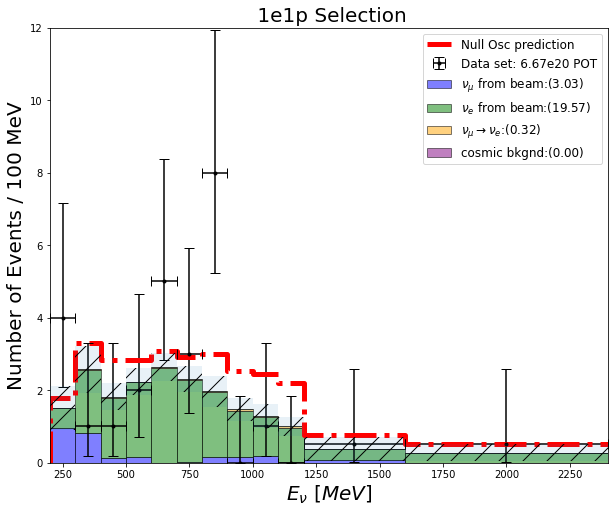

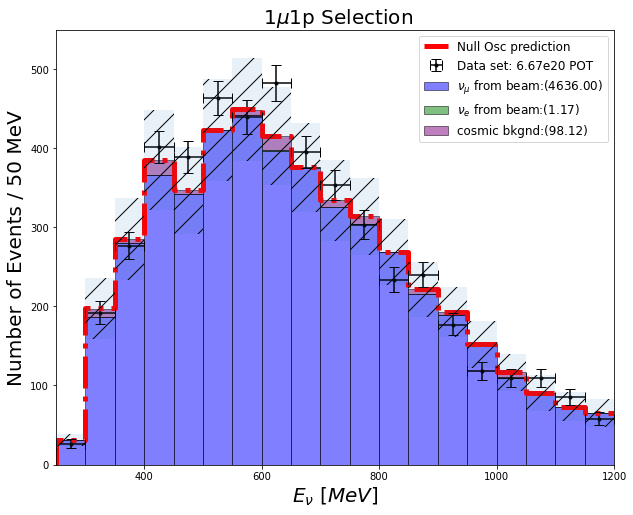

In [11]:
# yeah sorry about this... I needed them quickly while thesis writing...
bins_e=[200,300,400,500,600,700,800,900,1000,1100,1200,1600,2400]
bins_m=[250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]

cv_e=[0,1.77973, 3.299, 2.8411, 2.84015, 3.06677, 2.90407, 2.99971, 2.52731, 2.45532, 2.19775, 6.17792, 2.0456]
cv_m=[0,31.1745, 197.417, 285.531, 385.361, 347.205, 422.695, 449.114, 415.666, 375.7, 334.369, 314.139, 268.595, 221.893, 192.872, 152.109, 116.597, 90.355, 72.8464, 65.4711]

colors_e=["blue","green","orange","purple"]
colors_m=["blue","green","purple"]

data1_e=[4, 1, 1, 2, 5, 3, 8, 0, 1, 0, 4, 2]
data1_m=[26, 192, 276 ,401, 389, 463, 439, 482, 395, 353, 303, 233, 240, 177, 118, 109, 109, 85, 58]
cov1_e=[0.167194, 0.0637143, 0.0428048, 0.026791, 0.0215562, 0.024269, 0.0472897, 0.0450752, 0.0625464, 0.0745051, 0.0920382, 0.177687]
cov1_m=[0.0599551, 0.0383987, 0.0327556, 0.0270592, 0.0253559, 0.0232329, 0.0211305, 0.022293, 0.022824, 0.0233555, 0.0239237, 0.0245092, 0.0244174, 0.0277675, 0.0386294, 0.0399143, 0.0617907, 0.0630426, 0.075603]
spec1_e_bnb=[0.96253, 0.814089, 0.112574, 0.141942, 0, 0.0174654, 0.147536, 0.143849, 0.178721, 0.0189193, 0.489596, 0]
spec1_e_nue=[0.533563, 1.74208, 1.67443, 2.06921, 2.62094, 2.26015, 1.78808, 1.28699, 1.07243, 0.945039, 2.49523, 1.08234]
spec1_e_fullosc=[ 0.00556042, 0.0183222, 0.0246556, 0.0211497, 0.01525, 0.0216837, 0.0274999, 0.0366184, 0.034747, 0.0303309, 0.0710406, 0.011084]
spec1_e_ext=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
spec1_m_bnb=[31.1424, 187.011, 280.131, 366.418, 341.937, 422.435, 442.177, 397.09, 375.573, 325.983, 303.949, 268.525, 215.084, 189.668, 150.482, 109.81, 90.3234, 72.8191, 65.4425]
spec1_m_nue=[0.0142856, 0.159648, 0.260425, 0.236705, 0.140407, 0.116352, 0.0776386, 0.0539933, 0.0519575, 0.0172151, 0.0119557, 0.0101335, 0.00701612, 0.0025006, 0.00342524, 0.00266205, 0, 0.00107725, 0.00437872]
spec1_m_ext=[0, 9.90078, 4.83949, 18.0405, 4.83949, 0, 6.60052, 18.0405, 0, 8.13975, 9.90078, 0, 6.60052, 3.07846, 1.53923, 6.60052, 0, 0, 0]
spec1_e = [spec1_e_bnb, spec1_e_nue, spec1_e_fullosc,spec1_e_ext]
spec1_m = [spec1_m_bnb, spec1_m_nue, spec1_m_ext]
print(len(spec1_m_bnb),len(spec1_m_nue),len(spec1_m_ext))

labels1_e=[r'$\nu_\mu$ from beam:('+"{:.2f}".format(sum(spec1_e_bnb))+')',r'$\nu_e$ from beam:('+"{:.2f}".format(sum(spec1_e_nue))+')',r'$\nu_\mu \rightarrow \nu_e$:('"{:.2f}".format(sum(spec1_e_fullosc))+')','cosmic bkgnd:('+"{:.2f}".format(sum(spec1_e_ext))+')']
labels1_m=[r'$\nu_\mu$ from beam:('+"{:.2f}".format(sum(spec1_m_bnb))+')',r'$\nu_e$ from beam:('+"{:.2f}".format(sum(spec1_m_nue))+')','cosmic bkgnd:('+"{:.2f}".format(sum(spec1_m_ext))+')']


plothist(data1_e,data1_m,spec1_e,spec1_m,bins_e,bins_m,"",cv_e,cv_m,colors_e,colors_m,labels1_e,labels1_m,cov1_e,cov1_m)

In [12]:
def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    print("Poisson errors:",k)
    k=np.array(k)
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k

# now make a funtion for spectra plotting
def plotnullhist(data_e,data_m,spec_e,spec_m,bins_e,bins_m,datatitle,colors_e,colors_m,labels_e,labels_m,cov_e,cov_m,highbins=True):
#     change cov to be total
    cov_e=[cov_e[i]*((spec_e[0][i]+spec_e[1][i]+spec_e[2][i])**2) for i in range(len(bins_e)-1)]
    cov_m=[cov_m[i]*((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])**2) for i in range(len(bins_m)-1)]
    
    #adjust the last two bins of 1e1p because of width
    if(highbins):
        data_e[-1]=data_e[-1]/float(4.0)
        data_e[-2]=data_e[-2]/float(8.0)
        cov_e[-1]=cov_e[-1]/float(4.0)
        cov_e[-2]=cov_e[-2]/float(8.0)
        for spec in spec_e:
            spec[-1]=spec[-1]/float(4.0)
            spec[-2]=spec[-2]/float(8.0)
   
    #set overall paramters
    fonts=20
    ymax_e=12
    ymax_m=550
    
    # get centers of bins
    centers_e=[]
    centers_m=[]
    for i in range(len(bins_e)-1):
        centers_e.append(((bins_e[i+1]-bins_e[i])/2.0)+bins_e[i])
    print(centers_e)
    for i in range(len(bins_m)-1):
        centers_m.append(((bins_m[i+1]-bins_m[i])/2.0)+bins_m[i])
        
    # set size of xerr for data points (half bin width)
    xerr_e=[]
    if (highbins):
        xerr_e=[50,50,50,50,50,50,50,50,50,50,200,400]
    else:
        xerr_e=[50,50,50,50,50,50,50,50,50,50]
    xerr_m=[25 for i in range(len(data_m))]
    #now get the y error
    
    yerr_e = poisson_errors(data_e)
    yerr_m = poisson_errors(data_m)
    # get size of MC error
    mcerr_e=[math.sqrt(val) for val in cov_e]
    mcerr_m=[math.sqrt(val) for val in cov_m]
    errboxes_sys_e = []
    errboxes_sys_m = []

    for i in range(len(centers_e)):
        rect0 = Rectangle((bins_e[i],((spec_e[0][i]+spec_e[1][i]+spec_e[2][i])-mcerr_e[i])),xerr_e[i]*2,mcerr_e[i]*2)
        errboxes_sys_e.append(rect0)
    pc_sys_e = PatchCollection(errboxes_sys_e,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    for i in range(len(centers_m)):
        rect0 = Rectangle((bins_m[i],((spec_m[0][i]+spec_m[1][i]+spec_m[2][i])-mcerr_m[i])),xerr_m[i]*2,mcerr_m[i]*2)
        errboxes_sys_m.append(rect0)
    pc_sys_m = PatchCollection(errboxes_sys_m,facecolor=None,alpha=.1,hatch='/',zorder=12)
    
    # now get historams for the 1e1p and plot  
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_e)
    if(highbins):
        ax.set_xlim(200,2400)
    else:
        ax.set_xlim(200,1200)
    # next is data
    plt.errorbar(centers_e, data_e, yerr=yerr_e, xerr=xerr_e, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_e[:-1], height=spec_e[0], width=np.diff(bins_e), align='edge', fc=colors_e[0], ec='black',label=labels_e[0],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[1],bottom=np.array(spec_e[0]), width=np.diff(bins_e), align='edge', fc=colors_e[1], ec='black',label=labels_e[1],alpha=.5)
    plt.bar(x=bins_e[:-1], height=spec_e[2],bottom=np.array(spec_e[0])+np.array(spec_e[1]), width=np.diff(bins_e), align='edge', fc=colors_e[2], ec='black',label=labels_e[2],alpha=.5)
    ax.add_collection(pc_sys_e)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 100 MeV',fontsize=fonts)
    plt.title(datatitle+' 1e1p Selection',fontsize=fonts)
    pkl.dump(fig,open("data_1e1p_null_hist.p",'wb'))
    plt.show()
    plt.close()
    
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_ylim(0,ymax_m)
    ax.set_xlim(250,1200)
    # for cv, we just want a dashed line
    # next is data
    plt.errorbar(centers_m, data_m, yerr=yerr_m, xerr=xerr_m, fmt='.', capsize=5,color='black',label='Data set: 6.67e20 POT')
    # finally, the best fit prediction
    plt.bar(x=bins_m[:-1], height=spec_m[0], width=np.diff(bins_m), align='edge', fc=colors_m[0], ec='black',label=labels_m[0],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[1],bottom=np.array(spec_m[0]), width=np.diff(bins_m), align='edge', fc=colors_m[1], ec='black',label=labels_m[1],alpha=.5)
    plt.bar(x=bins_m[:-1], height=spec_m[2],bottom=np.array(spec_m[0])+np.array(spec_m[1]), width=np.diff(bins_m), align='edge', fc=colors_m[2], ec='black',label=labels_m[2],alpha=.5)
    ax.add_collection(pc_sys_m)
    plt.legend(fontsize=12)
    plt.xlabel(r'$E_\nu$ [$MeV$]',fontsize=fonts)
    plt.ylabel(r'Number of Events / 50 MeV',fontsize=fonts)
    plt.title(datatitle+r' 1$\mu$1p Selection',fontsize=fonts)
    pkl.dump(fig,open("data_1mu1p_null_hist.p",'wb'))
    plt.show()
    plt.close()
    return

19 19 19
[250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1400.0, 2000.0]
Poisson errors: [4, 1, 1, 2, 5, 3, 8, 0, 1, 0, 0.5, 0.5]
Poisson errors: [26, 192, 276, 401, 389, 463, 439, 482, 395, 353, 303, 233, 240, 177, 118, 109, 109, 85, 58]


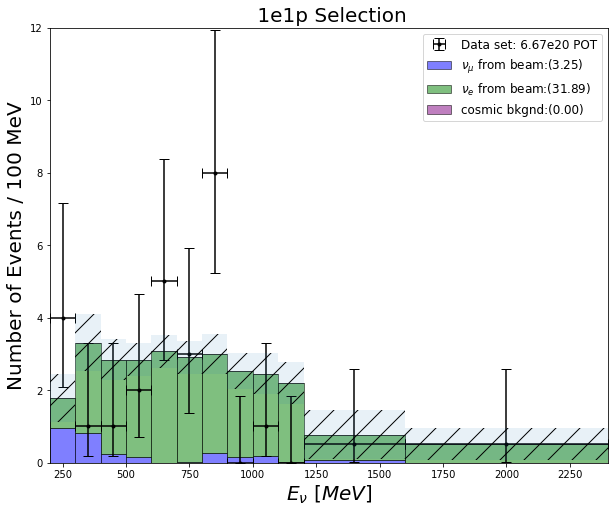

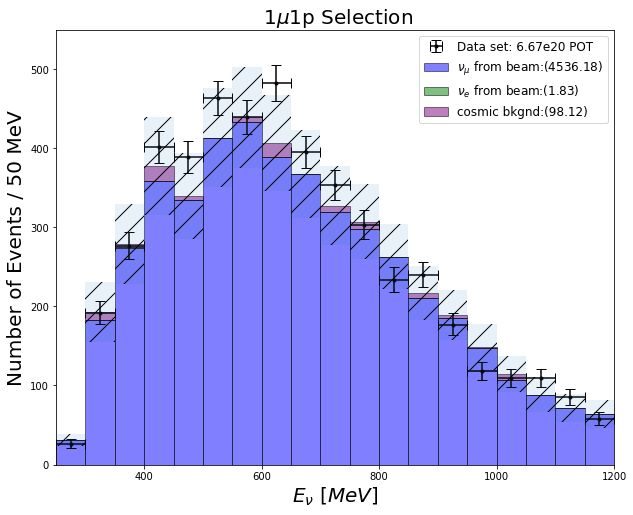

In [13]:
bins_e=[200,300,400,500,600,700,800,900,1000,1100,1200,1600,2400]
bins_m=[250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]

colors_e=["blue","green","purple"]
colors_m=["blue","green","purple"]

data1_e=[4, 1, 1, 2, 5, 3, 8, 0, 1, 0, 4, 2]
data1_m=[26, 192, 276 ,401, 389, 463, 439, 482, 395, 353, 303, 233, 240, 177, 118, 109, 109, 85, 58]
cov1_e=[0.143298, 0.0568568, 0.0397373, 0.0265785, 0.0214871, 0.0240281, 0.0348278, 0.0382548, 0.0511535, 0.0715626, 0.0937488, 0.176144]
cov1_m=[0.0599291, 0.038386, 0.0327415, 0.0270531, 0.0253513, 0.0232304, 0.0211297, 0.022293, 0.0228223, 0.0233554, 0.0239237, 0.024509, 0.0244171, 0.0277673, 0.0386289, 0.0399146, 0.0617907, 0.0630421, 0.0756023]
spec1_e_bnb=[0.962777, 0.814289, 0.222426, 0.141983, 0, 0.0174716, 0.25754, 0.143906, 0.178775, 0.0189263, 0.489734, 0]
spec1_e_nue=[0.816958, 2.48471, 2.61867, 2.69817, 3.06677, 2.8866, 2.74217, 2.38341, 2.27654, 2.17883, 5.68819, 2.0456]
spec1_e_ext=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
spec1_m_bnb=[30.4735, 182.986, 274.098, 358.55, 334.6, 413.342, 432.632, 388.503, 367.45, 318.938, 297.393, 262.744, 210.461, 185.598, 147.258, 107.46, 88.3917, 71.262, 64.0438 ]
spec1_m_nue=[0.023677, 0.241372, 0.388822, 0.396804, 0.221244, 0.167572, 0.122793, 0.0907694, 0.0855447, 0.0252973, 0.0198751, 0.0143395, 0.0104341, 0.00452612, 0.00660978, 0.00296959, 0, 0.00149287, 0.00466295]
spec1_m_ext=[0, 9.90078, 4.83949, 18.0405, 4.83949, 0, 6.60052, 18.0405, 0, 8.13975, 9.90078, 0, 6.60052, 3.07846, 1.53923, 6.60052, 0, 0, 0]
spec1_e = [spec1_e_bnb, spec1_e_nue, spec1_e_ext]
spec1_m = [spec1_m_bnb, spec1_m_nue, spec1_m_ext]
print(len(spec1_m_bnb),len(spec1_m_nue),len(spec1_m_ext))


labels1_e=[r'$\nu_{\mu}$ from beam:('+"{:.2f}".format(sum(spec1_e_bnb))+')',r'$\nu_e$ from beam:('+"{:.2f}".format(sum(spec1_e_nue))+')','cosmic bkgnd:('+"{:.2f}".format(sum(spec1_e_ext))+')']
labels1_m=[r'$\nu_{\mu}$ from beam:('+"{:.2f}".format(sum(spec1_m_bnb))+')',r'$\nu_e$ from beam:('+"{:.2f}".format(sum(spec1_m_nue))+')','cosmic bkgnd:('+"{:.2f}".format(sum(spec1_m_ext))+')']

plotnullhist(data1_e,data1_m,spec1_e,spec1_m,bins_e,bins_m,"",colors_e,colors_m,labels1_e,labels1_m,cov1_e,cov1_m,True)